<a href="https://colab.research.google.com/github/leonfullxr/Classifying-Mushrooms/blob/main/Clasificacion_de_setas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<header>
  <h1 align="center">Proyecto Final - Clasificación de Setas</h1>
  <h2 align="center">Aprendizaje Automático</h2>
  <h3 align="center">CURSO 2023-2024</h3>
</header>

<p align="center">
  <strong>Trabajo realizado por:</strong><br>
  Rafael Carrillo Arroyo.<br>
  Leon Elliott Fuller.<br>
  Pablo Gervilla Miranda. <br>
  Andrés Hurtado Morón.<br>
  <strong>Correo:</strong> <a href="mailto:leonfuller@correo.ugr.es">leonfuller@correo.ugr.es</a><br>
  <strong>Correo:</strong> <a href="mailto:rafacarrillo@correo.ugr.es">rafacarrillo@correo.ugr.es</a><br>
  <strong>Correo:</strong> <a href="mailto:andreshurtado@correo.ugr.es">andreshurtado@correo.ugr.es</a><br>
  <strong>Correo:</strong> <a href="mailto:pablogervilla@correo.ugr.es">pablogervilla@correo.ugr.es</a><br>
</p>

---

Presentación: https://docs.google.com/presentation/d/1AG0oAD-_G1kG5xMflz5a5SIeF-79QLGMgqqEBVoIEB0/edit?usp=sharing


# 1.Introducción
El conjunto de datos de "Secondary Mushroom" es un dataset generado con el propósito de simular características de hongos, inspirado en el conjunto de datos de hongos de J. Schlimmer, disponible en el repositorio de aprendizaje automático de la UCI. Este dataset incluye un total de 61,069 registros de hongos hipotéticos, basados en 173 especies, con 353 hongos por especie.

### Propósito del Conjunto de Datos

El conjunto de datos fue creado para estudiar y analizar las características de los hongos en términos de su comestibilidad. Cada hongo en el dataset está clasificado en una de las siguientes categorías:

- **Definitivamente comestible**
- **Definitivamente venenoso**
- **De comestibilidad desconocida y no recomendada** (esta clase se combinó con la clase de venenosos)

### Generación del Conjunto de Datos

El conjunto de datos fue generado utilizando un módulo de Python llamado `secondary_data_generation.py`, que se basa en un archivo de datos primarios (`primary_data_edited.csv`). Tanto las variables nominales como las métricas en este conjunto de datos son el resultado de un proceso de randomización.

### Estructura del Conjunto de Datos

El dataset viene en dos versiones:

1. **secondary_data_generated.csv**: Esta versión está ordenada por especies.
2. **secondary_data_shuffled.csv**: Esta versión está barajada aleatoriamente para asegurar que los datos no estén agrupados por especies, lo que puede ser útil para ciertos tipos de análisis y algoritmos de aprendizaje automático.

### Variables del Conjunto de Datos

El conjunto de datos incluye múltiples variables, tanto nominales como métricas, que describen diversas características de los hongos. Estas características pueden incluir el color, tamaño del sombrero, características del tallo, hábitat, y otras propiedades físicas que son importantes para determinar la comestibilidad de los hongos.

Referencias: https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset y Wagner, Dennis, Dominik Heider, and Georges Hattab. “Mushroom data creation, curation,
and simulation to support classification tasks.”Scientific reports 11.1 (2021): 8134.

***Librerias necesarias:***

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Fijamos la semilla aleatoria
SEED = 42
np.random.seed(SEED) #¿Por qué 42? https://en.wikipedia.org/wiki/Phrases_from_The_Hitchhiker%27s_Guide_to_the_Galaxy

In [ ]:
import sklearn
# if sklearn.__version__ < '1.3':
#   # Actualizamos scikit-learn para tener la última versión.
#   # Nos interesa de cara a disponer de las más recientes funcionalidades
#   # (como, por ejemplo, poder usar cross_validate() empleando el parámetros return_indices=True; https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html)
#   !pip install scikit-learn --upgrade
# else:
#   print('La versión de scikit-learn es: ', sklearn.__version__)

# Para instalar el repositorio de la UCI
!pip install ucimlrepo

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.exceptions import ConvergenceWarning
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, classification_report, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, learning_curve, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from tabulate import tabulate

***Cargamos datos***

**1ºForma**

In [ ]:
# Para importar los datos del repositorio
from ucimlrepo import fetch_ucirepo

# fetch dataset
secondary_mushroom = fetch_ucirepo(id=848)

**2ºForma**

Cargamos los datos desde el drive

In [ ]:
# #Para acceder a nuestros ficheros de Google Drive
# from google.colab import drive
# drive.mount('/content/drive')
# dataFolder = 'drive/MyDrive/Colab Notebooks/MushroomDataset/Setas/'


In [ ]:
# # Ruta de los archivos CSV en tu carpeta de Google Drive
# primary_data_path = '/content/drive/MyDrive/Colab Notebooks/Setas/MushroomDataset/primary_data.csv'
# secondary_data_path = '/content/drive/MyDrive/Colab Notebooks/Setas/MushroomDataset/secondary_data.csv'

# # Cargar datos primarios
# primary_data = pd.read_csv(primary_data_path, delimiter=';')

# # Cargar datos secundarios
# secondary_data = pd.read_csv(secondary_data_path)


Nosotros vamos a usar la primera opción, para que no haya conflictos de la versión de las carpetas descargadas y para que sea más cómodo para cualquier persona ejecutar el proyecto sin necesidad de descargar los archivos y tener que ponerlos en el drive.

## 1.1 Vista inicial de los datos
El conjunto de datos original del problema se compone de atributos flotantes y categóricos, con siglas que describen las características físicas de los hongos. Reemplazo las siglas con su significado para tener un conjunto de datos que tenga mayor explicabilidad a la hora de graficar los atributos, trabajar con ellos, etc.

In [ ]:
# data (as pandas dataframes)
X = secondary_mushroom.data.features.copy()
y = secondary_mushroom.data.targets.copy()

# metadata
print(secondary_mushroom.metadata)

# variable information
print(secondary_mushroom.variables)

{'uci_id': 848, 'name': 'Secondary Mushroom', 'repository_url': 'https://archive.ics.uci.edu/dataset/848/secondary+mushroom+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/848/data.csv', 'abstract': 'Dataset of simulated mushrooms for binary classification into edible and poisonous.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 61068, 'num_features': 20, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2021, 'last_updated': 'Wed Apr 10 2024', 'dataset_doi': '10.24432/C5FP5Q', 'creators': ['Dennis Wagner', 'D. Heider', 'Georges Hattab'], 'intro_paper': {'title': 'Mushroom data creation, curation, and simulation to support classification tasks', 'authors': 'Dennis Wagner, D. Heider, Georges Hattab', 'published_in': 'Scientific Reports', 'year': 2021, 'url': 'https://www.semanticscholar.org/

In [ ]:
print(X.head())

   cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0         15.26         x           g         o                    f   
1         16.60         x           g         o                    f   
2         14.07         x           g         o                    f   
3         14.17         f           h         e                    f   
4         14.64         x           h         o                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width stem-root  \
0               e          NaN          w        16.95       17.09         s   
1               e          NaN          w        17.99       18.19         s   
2               e          NaN          w        17.80       17.74         s   
3               e          NaN          w        15.77       15.98         s   
4               e          NaN          w        16.53       17.20         s   

  stem-surface stem-color veil-type veil-color has-ring ring-type  \
0            y   

In [ ]:
X

cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0             15.26         x           g         o                    f   
1             16.60         x           g         o                    f   
2             14.07         x           g         o                    f   
3             14.17         f           h         e                    f   
4             14.64         x           h         o                    f   
...             ...       ...         ...       ...                  ...   
61064          1.18         s           s         y                    f   
61065          1.27         f           s         y                    f   
61066          1.27         s           s         y                    f   
61067          1.24         f           s         y                    f   
61068          1.17         s           s         y                    f   

      gill-attachment gill-spacing gill-color  stem-height  stem-width  \
0                   e          NaN          w        16.95       17.09   
1                   e          NaN          w        17.99       18.19   
2                   e          NaN          w        17.80       17.74   
3                   e          NaN          w        15.77       15.98   
4                   e          NaN          w        16.53       17.20   
...               ...          ...        ...          ...         ...   
61064               f            f          f         3.93        6.22   
61065               f            f          f         3.18        5.43   
61066               f            f          f         3.86        6.37   
61067               f            f          f         3.56        5.44   
61068               f            f          f         3.25        5.45   

      stem-root stem-surface stem-color veil-type veil-color has-ring  \
0             s            y          w         u          w        t   
1             s            y          w         u          w        t   
2             s            y          w         u          w        t   
3             s            y          w         u          w        t   
4             s            y          w         u          w        t   
...         ...          ...        ...       ...        ...      ...   
61064       NaN          NaN          y       NaN        NaN        f   
61065       NaN          NaN          y       NaN        NaN        f   
61066       NaN          NaN          y       NaN        NaN        f   
61067       NaN          NaN          y       NaN        NaN        f   
61068       NaN          NaN          y       NaN        NaN        f   

      ring-type spore-print-color habitat season  
0             g               NaN       d      w  
1             g               NaN       d      u  
2             g               NaN       d      w  
3             p               NaN       d      w  
4             p               NaN       d      w  
...         ...               ...     ...    ...  
61064         f               NaN       d      a  
61065         f               NaN       d      a  
61066         f               NaN       d      u  
61067         f               NaN       d      u  
61068         f               NaN       d      u  

[61069 rows x 20 columns]

## 1.2 Reemplazamos las etiquetas por nombres más descriptivos

In [ ]:
# Aplicamos las transformaciones a las variables de X para que sean más descriptivas
X.replace({
    'cap-shape': {
        'b': 'bell', 'c': 'conical', 'x': 'convex', 'f': 'flat',
        's': 'sunken', 'p': 'spherical', 'o': 'others'
    },
    'cap-surface': {
        'i': 'fibrous', 'g': 'grooves', 'd': 'dry', 'y': 'scaly',
        's': 'smooth', 'h': 'shiny', 'l': 'leathery', 'k': 'silky',
        't': 'sticky', 'w': 'wrinkled', 'e': 'fleshy'
    },
    'cap-color': {
        'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green',
        'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white',
        'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black'
    },
    'gill-attachment': {
        'a': 'adnate', 'x': 'adnexed', 'd': 'decurrent', 'e': 'free',
        's': 'sinuate', 'p': 'pores', 'f': 'none', '?': 'unknown'
    },
    'gill-spacing': {
        'c': 'close', 'd': 'distant', 'f': 'none'
    },
    'gill-color': {
        'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green',
        'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white',
        'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black',
        'f': 'none'
    },
    'stem-root': {
        'b': 'bulbous', 's': 'swollen', 'c': 'club', 'u': 'cup',
        'e': 'equal', 'z': 'rhizomorphs', 'r': 'rooted'
    },
    'stem-surface': {
        'i': 'fibrous', 'g': 'grooves', 'd': 'dry', 'y': 'scaly',
        's': 'smooth', 'h': 'shiny', 'l': 'leathery', 'k': 'silky',
        't': 'sticky', 'w': 'wrinkled', 'e': 'fleshy', 'f': 'none'
    },
    'stem-color': {
        'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green',
        'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white',
        'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black',
        'f': 'none'
    },
    'veil-type': {
        'u': 'universal', 'p': 'partial'
    },
    'veil-color': {
        'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green',
        'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white',
        'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black',
        'f': 'none'
    },
    'ring-type': {
        'c': 'cobwebby', 'e': 'evanescent', 'r': 'flyring', 'g': 'grooved',
        'l': 'large', 'p': 'pendant', 's': 'sheathing', 'z': 'zone',
        'y': 'scaly', 'm': 'movable', 'f': 'none', '?': 'unknown'
    },
    'spore-print-color': {
        'n': 'brown', 'b': 'buff', 'g': 'gray', 'r': 'green',
        'p': 'pink', 'u': 'purple', 'e': 'red', 'w': 'white',
        'y': 'yellow', 'l': 'blue', 'o': 'orange', 'k': 'black'
    },
    'habitat': {
        'g': 'grasses', 'l': 'leaves', 'm': 'meadows', 'p': 'paths',
        'h': 'heaths', 'u': 'urban', 'w': 'waste', 'd': 'woods'
    },
    'season': {
        's': 'spring', 'u': 'summer', 'a': 'autumn', 'w': 'winter'
    }
}, inplace=True)

# Convertimos y a una variable descriptiva si es necesario
y.replace({
    'e': 'edible',
    'p': 'poisonous'
}, inplace=True)

In [ ]:
# Verificamos las transformaciones
print(X.head())
print(y.head())

   cap-diameter cap-shape cap-surface cap-color does-bruise-or-bleed  \
0         15.26    convex     grooves    orange                    f   
1         16.60    convex     grooves    orange                    f   
2         14.07    convex     grooves    orange                    f   
3         14.17      flat       shiny       red                    f   
4         14.64    convex       shiny    orange                    f   

  gill-attachment gill-spacing gill-color  stem-height  stem-width stem-root  \
0            free          NaN      white        16.95       17.09   swollen   
1            free          NaN      white        17.99       18.19   swollen   
2            free          NaN      white        17.80       17.74   swollen   
3            free          NaN      white        15.77       15.98   swollen   
4            free          NaN      white        16.53       17.20   swollen   

  stem-surface stem-color  veil-type veil-color has-ring ring-type  \
0        scaly  

In [ ]:
X.shape

(61069, 20)

In [ ]:
y.shape

(61069, 1)

In [ ]:
# Ver los posibles valores únicos de y
y = y.squeeze()
unique_values = y.unique()
print("Valores únicos en la variable 'y':", unique_values)

# Ver los valores únicos y sus frecuencias
value_counts = y.value_counts()
print("\nFrecuencias de los valores únicos en la variable 'y':\n", value_counts)

Valores únicos en la variable 'y': ['poisonous' 'edible']

Frecuencias de los valores únicos en la variable 'y':
 class
poisonous    33888
edible       27181
Name: count, dtype: int64


Podemos observar que solamente tenemos dos clases en las etiquetas correspondientes a la comestibilidad. Por tanto, sería lógico pensar que tenemos un problema binario de decisión.

In [ ]:
X.describe()

cap-diameter   stem-height    stem-width
count  61069.000000  61069.000000  61069.000000
mean       6.733854      6.581538     12.149410
std        5.264845      3.370017     10.035955
min        0.380000      0.000000      0.000000
25%        3.480000      4.640000      5.210000
50%        5.860000      5.950000     10.190000
75%        8.540000      7.740000     16.570000
max       62.340000     33.920000    103.910000

In [ ]:
X.isnull().sum()

cap-diameter                0
cap-shape                   0
cap-surface             14120
cap-color                   0
does-bruise-or-bleed        0
gill-attachment          9884
gill-spacing            25063
gill-color                  0
stem-height                 0
stem-width                  0
stem-root               51538
stem-surface            38124
stem-color                  0
veil-type               57892
veil-color              53656
has-ring                    0
ring-type                2471
spore-print-color       54715
habitat                     0
season                      0
dtype: int64

In [ ]:
# Calcular el porcentaje de valores nulos de cada atributo
null_percentage = X.isnull().sum() / len(X) * 100

# Formatear el porcentaje de valores nulos como cadenas con el símbolo de porcentaje
null_percentage_formatted = null_percentage.map(lambda x: f'{x:.2f}%')
null_percentage_formatted

cap-diameter             0.00%
cap-shape                0.00%
cap-surface             23.12%
cap-color                0.00%
does-bruise-or-bleed     0.00%
gill-attachment         16.18%
gill-spacing            41.04%
gill-color               0.00%
stem-height              0.00%
stem-width               0.00%
stem-root               84.39%
stem-surface            62.43%
stem-color               0.00%
veil-type               94.80%
veil-color              87.86%
has-ring                 0.00%
ring-type                4.05%
spore-print-color       89.60%
habitat                  0.00%
season                   0.00%
dtype: object

Aqui podemos apreciar que hay bastantes valores nulos, en el apartado de preprocesamiento de los datos vamos a estudiar lo que realizar.

In [ ]:
# Imprimimos el número de valores únicos para cada columna en X
for column in X.columns:
    num_unique_values = X[column].nunique()
    print(f'{column}, Valores únicos: {num_unique_values}')


cap-diameter, Valores únicos: 2571
cap-shape, Valores únicos: 7
cap-surface, Valores únicos: 11
cap-color, Valores únicos: 12
does-bruise-or-bleed, Valores únicos: 2
gill-attachment, Valores únicos: 7
gill-spacing, Valores únicos: 3
gill-color, Valores únicos: 12
stem-height, Valores únicos: 2226
stem-width, Valores únicos: 4630
stem-root, Valores únicos: 5
stem-surface, Valores únicos: 8
stem-color, Valores únicos: 13
veil-type, Valores únicos: 1
veil-color, Valores únicos: 6
has-ring, Valores únicos: 2
ring-type, Valores únicos: 8
spore-print-color, Valores únicos: 7
habitat, Valores únicos: 8
season, Valores únicos: 4


Podemos observar como el atributo 'veil-type' posee solo 1 valor, haciendo que sea justificable eliminarla.

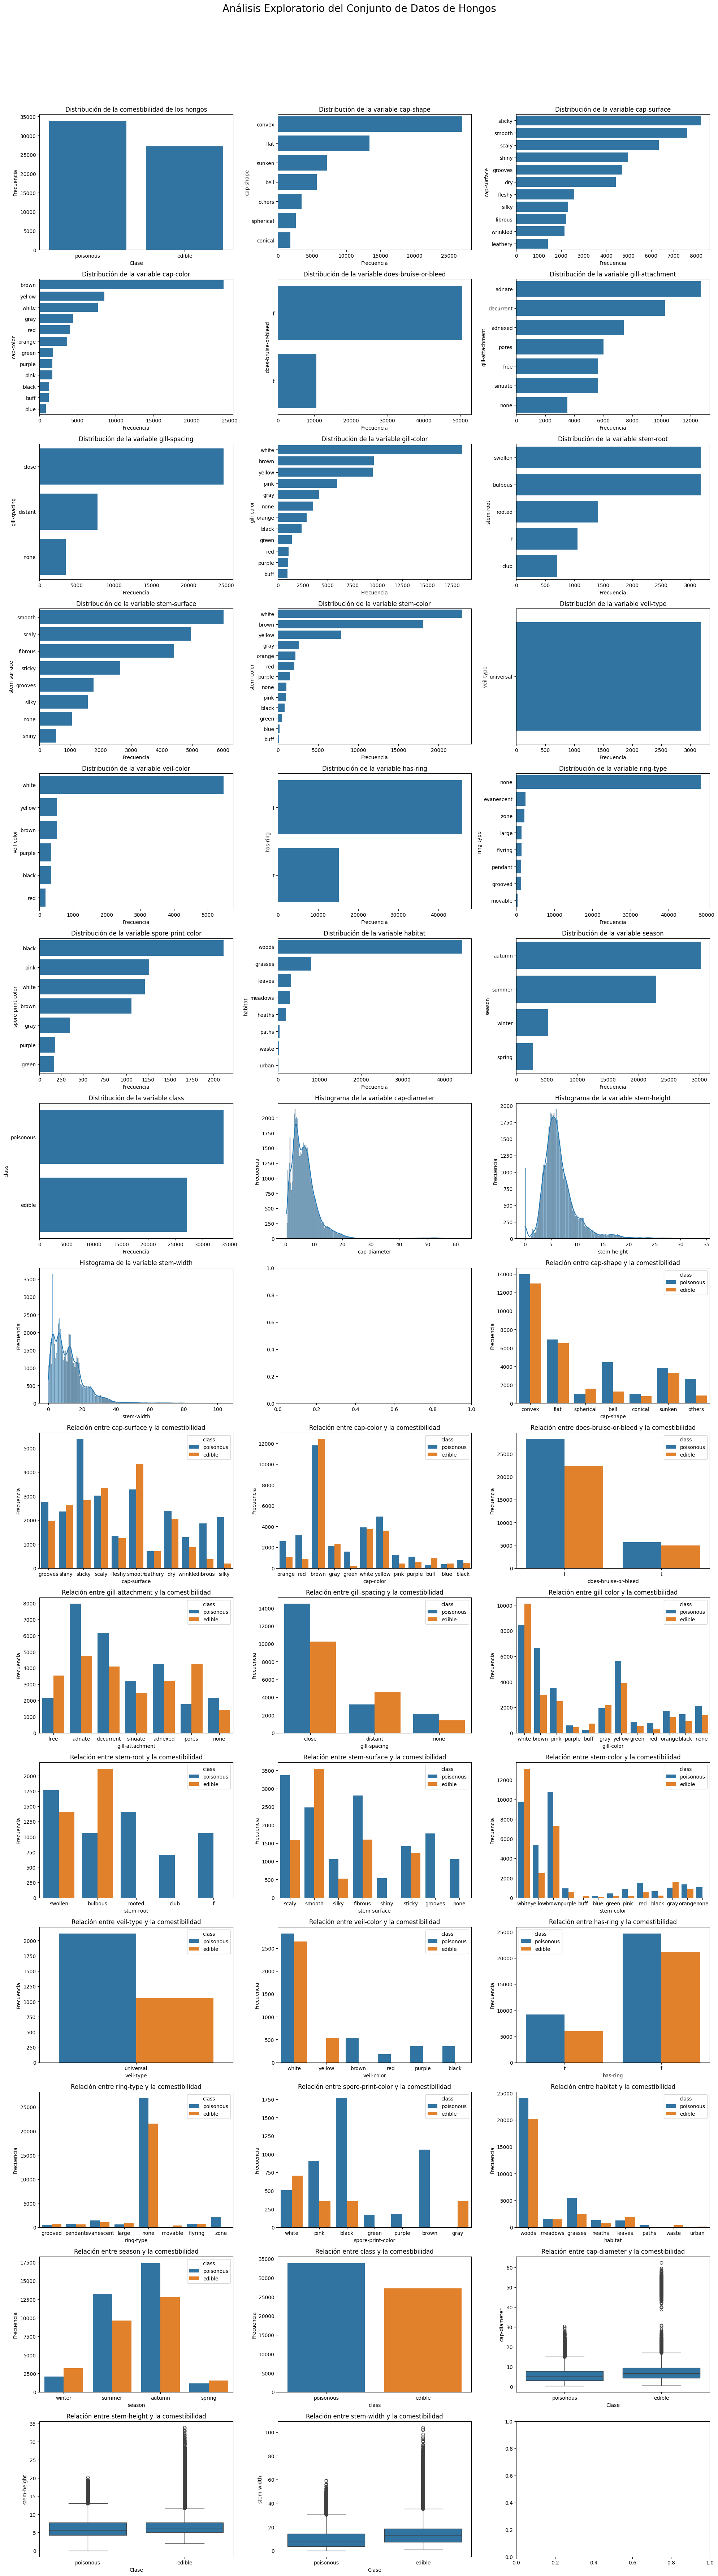

In [ ]:
# Unimos las características y las etiquetas en un solo DataFrame para facilitar el análisis
data = pd.concat([X, y], axis=1)

# Determinar el número de variables nominales y métricas
nominal_columns = data.select_dtypes(include=['object']).columns
metric_columns = data.select_dtypes(include=['number']).columns

# Calcular el número total de gráficos
total_plots = 1 + len(nominal_columns) + len(metric_columns) + 1 + len(nominal_columns) + len(metric_columns)

# Calcular el número de filas necesarias para acomodar todos los gráficos en una cuadrícula de 3 columnas
rows = (total_plots + 2) // 3

# Configurar el tamaño del lienzo general
fig, axes = plt.subplots(rows, 3, figsize=(20, rows * 5))
fig.suptitle('Análisis Exploratorio del Conjunto de Datos de Hongos', fontsize=20)

# Distribución de la variable objetivo
sns.countplot(x='class', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de la comestibilidad de los hongos')
axes[0, 0].set_xlabel('Clase')
axes[0, 0].set_ylabel('Frecuencia')

# Análisis de las variables nominales
for i, col in enumerate(nominal_columns):
    sns.countplot(y=col, data=data, order=data[col].value_counts().index, ax=axes[(i+1)//3, (i+1)%3])
    axes[(i+1)//3, (i+1)%3].set_title(f'Distribución de la variable {col}')
    axes[(i+1)//3, (i+1)%3].set_xlabel('Frecuencia')
    axes[(i+1)//3, (i+1)%3].set_ylabel(col)

# Análisis de las variables métricas
for i, col in enumerate(metric_columns):
    sns.histplot(data[col], kde=True, ax=axes[(i+len(nominal_columns)+1)//3, (i+len(nominal_columns)+1)%3])
    axes[(i+len(nominal_columns)+1)//3, (i+len(nominal_columns)+1)%3].set_title(f'Histograma de la variable {col}')
    axes[(i+len(nominal_columns)+1)//3, (i+len(nominal_columns)+1)%3].set_xlabel(col)
    axes[(i+len(nominal_columns)+1)//3, (i+len(nominal_columns)+1)%3].set_ylabel('Frecuencia')


# Relación entre variables y la clase (variables nominales)
for i, col in enumerate(nominal_columns):
    sns.countplot(x=col, hue='class', data=data, ax=axes[(i+len(nominal_columns)+len(metric_columns)+2)//3, (i+len(nominal_columns)+len(metric_columns)+2)%3])
    axes[(i+len(nominal_columns)+len(metric_columns)+2)//3, (i+len(nominal_columns)+len(metric_columns)+2)%3].set_title(f'Relación entre {col} y la comestibilidad')
    axes[(i+len(nominal_columns)+len(metric_columns)+2)//3, (i+len(nominal_columns)+len(metric_columns)+2)%3].set_xlabel(col)
    axes[(i+len(nominal_columns)+len(metric_columns)+2)//3, (i+len(nominal_columns)+len(metric_columns)+2)%3].set_ylabel('Frecuencia')

# Relación entre variables y la clase (variables métricas)
for i, col in enumerate(metric_columns):
    sns.boxplot(x='class', y=col, data=data, ax=axes[(i+2*len(nominal_columns)+len(metric_columns)+2)//3, (i+2*len(nominal_columns)+len(metric_columns)+2)%3])
    axes[(i+2*len(nominal_columns)+len(metric_columns)+2)//3, (i+2*len(nominal_columns)+len(metric_columns)+2)%3].set_title(f'Relación entre {col} y la comestibilidad')
    axes[(i+2*len(nominal_columns)+len(metric_columns)+2)//3, (i+2*len(nominal_columns)+len(metric_columns)+2)%3].set_xlabel('Clase')
    axes[(i+2*len(nominal_columns)+len(metric_columns)+2)//3, (i+2*len(nominal_columns)+len(metric_columns)+2)%3].set_ylabel(col)

# Ajustar el layout para que no haya solapamiento
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Del análisis podemos deducir cómo las variables 'ring-type' y 'habitat' son constantes para la mayoría de los casos y por tanto planteamos la hipótesis de que tienen poca importancia para la clasificación del problema. Observamos también que también existen otras variables con un valor predominante, aunque en menor medida que las dos anteriormente mencionadas. Lo comprobaremos posteriormente en el apartado del preprocesamiento de los datos.

Variables como gill-color, cap-color, y stem-color muestran diferencias notables en la frecuencia de hongos comestibles y venenosos. Por ejemplo, ciertos colores de cap y gill son más prevalentes en hongos venenosos que en comestibles.

stem-surface muestra patrones más claros, con superficies como scaly y fibrous indicando una mayor probabilidad de ser venenosos, mientras que smooth tiende a estar asociado con hongos comestibles.

veil-color es útil en cierta medida, ya que colores menos comunes del velo tienden a estar asociados con hongos venenosos, aunque el color white es demasiado común en ambos tipos para ser un buen predictor independiente.

Ahora vamos a mostrar la relaciones que hay entre la altura, anchura y el diámetro de los datos, para ver si la relación influye en la comestibilidad de los datos.

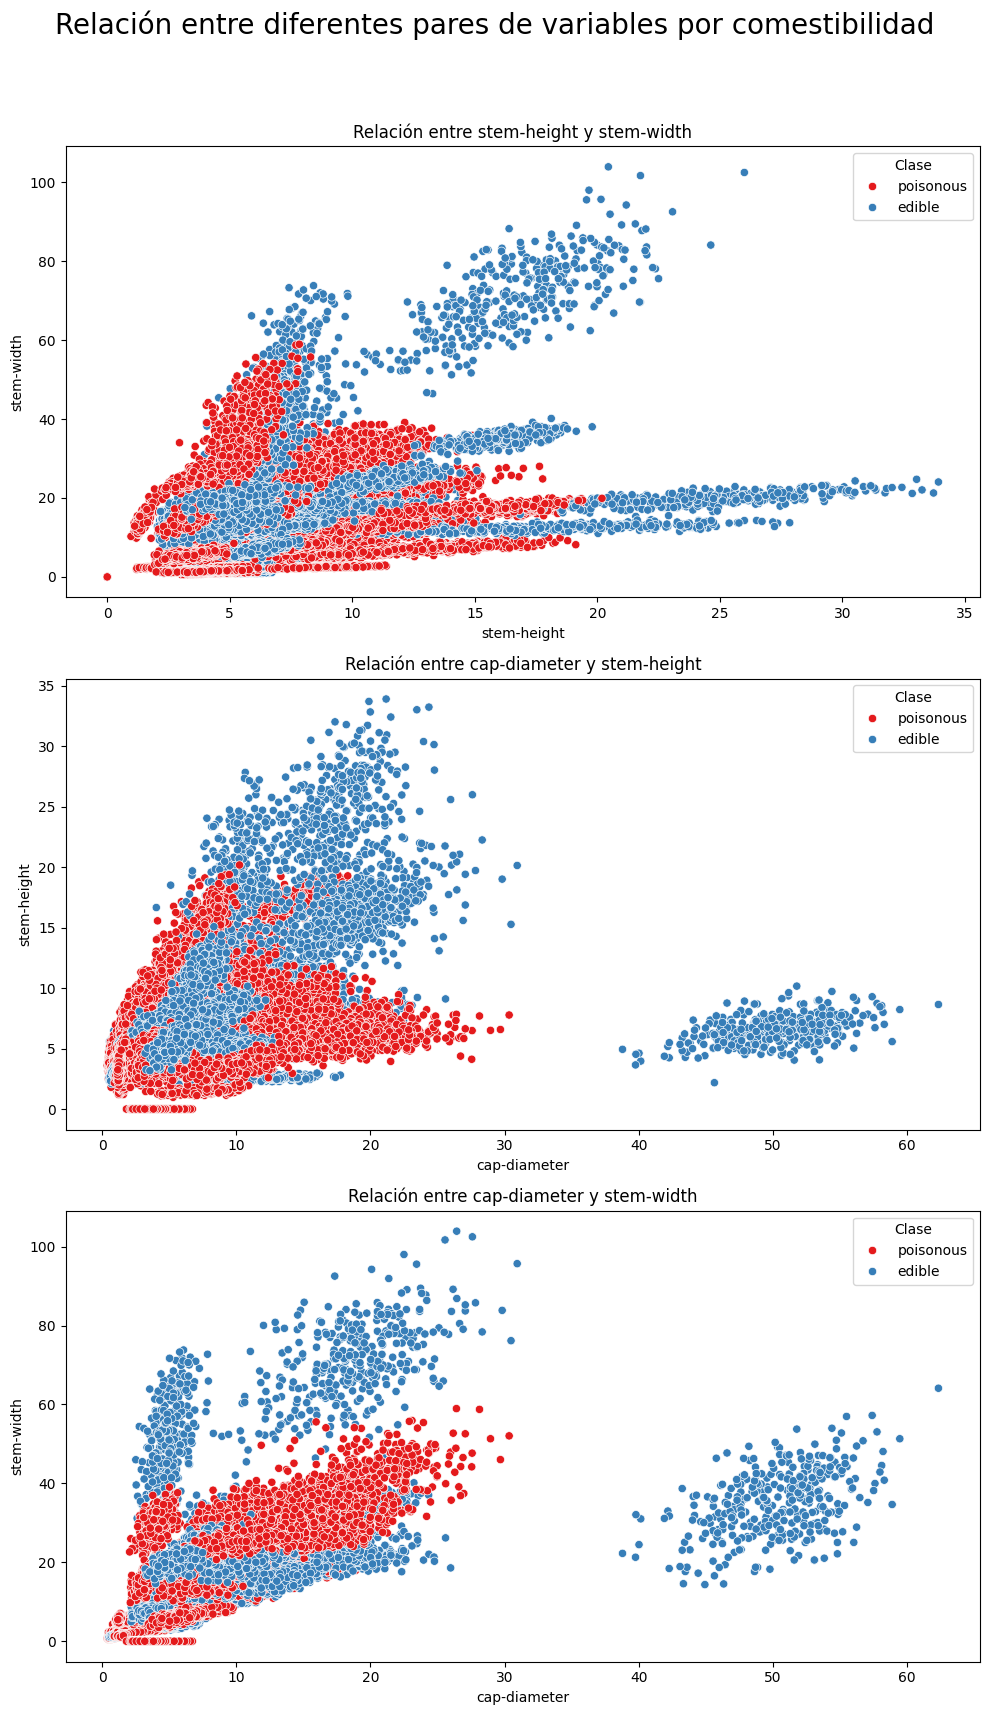

In [ ]:
# Lista de pares de variables a graficar, en base a que son los únicos valores continuos
pairs_to_plot = [
    ('stem-height', 'stem-width'),
    ('cap-diameter', 'stem-height'),
    ('cap-diameter', 'stem-width'),
]

# Crear gráficos de dispersión
fig, axes = plt.subplots(len(pairs_to_plot), 1, figsize=(10, len(pairs_to_plot) * 6))
fig.suptitle('Relación entre diferentes pares de variables por comestibilidad', fontsize=20)

for i, (x_var, y_var) in enumerate(pairs_to_plot):
    sns.scatterplot(x=x_var, y=y_var, hue='class', data=data, palette='Set1', ax=axes[i])
    axes[i].set_title(f'Relación entre {x_var} y {y_var}')
    axes[i].set_xlabel(x_var)
    axes[i].set_ylabel(y_var)
    axes[i].legend(title='Clase')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

## 1.3 Análisis de los Gráficos
#### Gráfico 1: Relación entre `stem-height` y `stem-width`

1. **Distribución de las clases**:
   - Los hongos comestibles (azules) están más dispersos en rangos más amplios de `stem-height` y `stem-width`.
   - Los hongos venenosos (rojos) tienden a agruparse en áreas más específicas, especialmente en la parte baja de `stem-height` y `stem-width`.

2. **Posible influencia de las variables**:
   - La altura del tallo (`stem-height`) parece tener una influencia en la clasificación, ya que los hongos comestibles tienen una mayor variabilidad en altura.
   - El ancho del tallo (`stem-width`) también muestra variabilidad, pero menos pronunciada en comparación con la altura.

#### Gráfico 2: Relación entre `cap-diameter` y `stem-height`

1. **Distribución de las clases**:
   - Los hongos comestibles están dispersos en rangos más amplios de `cap-diameter` y `stem-height`.
   - Los hongos venenosos están agrupados principalmente en la parte baja y media de `cap-diameter` y `stem-height`.

2. **Posible influencia de las variables**:
   - El diámetro del sombrero (`cap-diameter`) parece influir en la clasificación, con una mayor dispersión en los hongos comestibles.
   - La altura del tallo (`stem-height`) muestra una clara diferenciación entre los hongos comestibles y venenosos.

#### Gráfico 3: Relación entre `cap-diameter` y `stem-width`

1. **Distribución de las clases**:
   - Se observa una distribución similar a los gráficos anteriores, con puntos comestibles (azules) y venenosos (rojos) distribuidos en diferentes áreas del gráfico.
   - Los hongos comestibles están más dispersos en rangos más amplios de `cap-diameter` y `stem-width`.
   - Los hongos venenosos están agrupados principalmente en la parte baja y media de `cap-diameter` y `stem-width`.

2. **Posible influencia de las variables**:
   - El diámetro del sombrero (`cap-diameter`) nuevamente parece ser un factor diferenciador, con una mayor variabilidad en los hongos comestibles.
   - El ancho del tallo (`stem-width`) muestra variabilidad, pero con una clara agrupación de hongos venenosos en la parte baja y media del gráfico.

### Conclusiones

1. **Diferenciación de clases**:
   - En todos los gráficos, hay una diferenciación clara entre los hongos comestibles y venenosos, con los hongos comestibles mostrando una mayor variabilidad en las características analizadas.

2. **Influencia de las variables**:
   - Las variables `stem-height`, `stem-width`, y `cap-diameter` parecen influir en la clasificación de los hongos.
   - Los hongos comestibles tienden a tener una mayor variabilidad en altura del tallo y diámetro del sombrero, lo que podría ser un factor importante para la clasificación.

3. **Agrupación de datos**:
   - Los hongos venenosos tienden a agruparse en áreas específicas del gráfico, lo que sugiere que ciertas combinaciones de estas características son indicativas de hongos venenosos.

# 2.Preprocesamiento de los Datos

La mayoría de los modelos de aprendizaje automático esperan que las características sean variables numéricas continuas. Además, la última vez que lo comprobé, Scikit-learn lo hacía obligatorio. Sin embargo, muchas de nuestras caracteristicas son variables categoricas. Esto significa que tendremos que codificarlas con números para que podamos realizar los cálculos necesarios para entrenar un clasificador.

Una opción de codificación es convertir los distintos valores de cada característica en números enteros (LabelEncoder de Scikit-learn es muy útil). Por ejemplo, los valores del color del velo son marrón, naranja, blanco y amarillo, pero pueden representarse con 1, 2, 3 y 4, respectivamente. Por desgracia, esta estrategia tiene implicaciones absurdas: ¡el amarillo no es cuatro veces el valor del marrón! Ahora bien, si nuestras características fueran variables categóricas ordinales, como la talla de la camiseta (pequeña, mediana, grande), esta estrategia podría haber funcionado.

En cambio, nuestras características son variables categóricas nominales sin orden intrínseco. Por lo tanto, tendremos que realizar una codificación de una sola vez, en la que cada característica con z
 valores posibles se convierte en z
 características binarias, de las cuales sólo una es "on". Podríamos utilizar OneHotEncoder de Scikit-learn para ejecutar esta estrategia

## 2.1 Transformación de etiquetas categóricas

In [ ]:
# Transformamos las etiquetas con LabelEncoder
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

Ahora, antes de transformar nuestras variables categóricas de X, vamos a realizar un estudio sobre nuestras columnas del conjunto, para comprobar qué características son relevantes y cuáles no

##2.2 Prueba de chi cuadrado y limpieza de características irrelevantes

La prueba de chi-cuadrado se utiliza para evaluar si existe una asociación significativa entre dos variables categóricas. En este contexto, estamos utilizando la prueba de chi-cuadrado para determinar si existe una relación significativa entre cada característica (columna) de los datos de los hongos y la variable objetivo (si el hongo es comestible o venenoso).

Explicación de los pasos:

1.Definición del Nivel de Significancia: Definimos alpha como 0.05.

2.Inicialización del Diccionario de Valores p: Creamos un diccionario values para almacenar los valores p de cada columna.

3.Iteración sobre las Columnas de X: Iteramos sobre cada columna de X.

4.Creación de la Tabla de Contingencia: Utilizamos pd.crosstab para crear una tabla de contingencia entre la columna actual y la clase.

5.Prueba de Chi-cuadrado: Usamos stats.chi2_contingency para realizar la prueba de chi-cuadrado y obtener los valores p.

6.Almacenamiento y Evaluación del Valor p: Almacenamos el valor p en el diccionario y evaluamos si es menor que alpha para determinar la importancia de la columna.

7.Mostrar los Resultados: Imprimimos si la columna es importante o no y mostramos todos los valores p almacenados en el diccionario al final.


Cuanto más bajo sea el valor p, más probable es que la característica tenga una relación significativa con la variable objetivo y, por lo tanto, sea importante. Si el valor p es menor que el nivel de significancia (alpha), rechazamos la hipótesis nula y concluimos que la característica es importante.

In [ ]:
# Definir alpha
alpha = 0.05

# Crear un diccionario para almacenar los valores p
values = {}

# Iterar sobre cada columna en X
for col in X.columns.values:
    # Crear una tabla de contingencia entre la columna actual y la clase
    dfObserved = pd.crosstab(X[col], y)

    # Realizar la prueba de chi-cuadrado
    chi2, p, dof, expected = scipy.stats.chi2_contingency(dfObserved.values)

    # Almacenar el valor p en el diccionario
    values[col] = p

    # Evaluar si el valor p es menor que alpha
    if p < alpha:
        # Rechazar la hipótesis nula
        print(f"{col} es importante. (p = {p})")
    else:
        # Aceptar la hipótesis nula
        print(f"{col} NO es importante. (p = {p})")

# Mostrar los valores p almacenados
print("Valores p:")
print(values)

cap-diameter es importante. (p = 6.90834750533752e-251)
cap-shape es importante. (p = 0.0)
cap-surface es importante. (p = 0.0)
cap-color es importante. (p = 0.0)
does-bruise-or-bleed es importante. (p = 9.381208881872168e-07)
gill-attachment es importante. (p = 0.0)
gill-spacing es importante. (p = 2.6027918571799056e-171)
gill-color es importante. (p = 0.0)
stem-height es importante. (p = 0.0)
stem-width es importante. (p = 0.0)
stem-root es importante. (p = 0.0)
stem-surface es importante. (p = 0.0)
stem-color es importante. (p = 0.0)
veil-type NO es importante. (p = 1.0)
veil-color es importante. (p = 0.0)
has-ring es importante. (p = 7.427498993566696e-46)
ring-type es importante. (p = 0.0)
spore-print-color es importante. (p = 0.0)
habitat es importante. (p = 0.0)
season es importante. (p = 4.0178666316236727e-181)
Valores p:
{'cap-diameter': 6.90834750533752e-251, 'cap-shape': 0.0, 'cap-surface': 0.0, 'cap-color': 0.0, 'does-bruise-or-bleed': 9.381208881872168e-07, 'gill-attachm

Nos da como resultado que la columna 'veil-type' no es importante, lo cual es lógico por lo que hemos comentado anteriormente de que solamente posee un único valor, por lo que podemos borrarla directamente, y luego ya podremos transformar nuestras características categoricas a numéricas

In [ ]:
# Eliminamos la columna 'veil-type' de X
X.drop(columns=['veil-type'], inplace=True)

##2.3 Transformación de características categóricas

In [ ]:
# Transformamos las variables categóricas a numéricas
column_transformer = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), X.select_dtypes(include=['object']).columns)],
    remainder='passthrough'
)

X_encoded = column_transformer.fit_transform(X)

# Transformamos la matriz dispersa a un array
X_encoded = X_encoded.toarray()

Por último, vamos a escalar nuestros datos usando StandardScaler()

##2.4 Escalado de los datos y preparación para su entrenamiento

In [ ]:
#escalamos el array resultante
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)

In [ ]:
# Convertimos el array escalado en un DataFrame
feature_names = column_transformer.get_feature_names_out()
X_scaled_df = pd.DataFrame(X_scaled, columns=feature_names)

X = X_scaled_df
y = y_encoded

## 2.5 Reducción de dimensionalidad

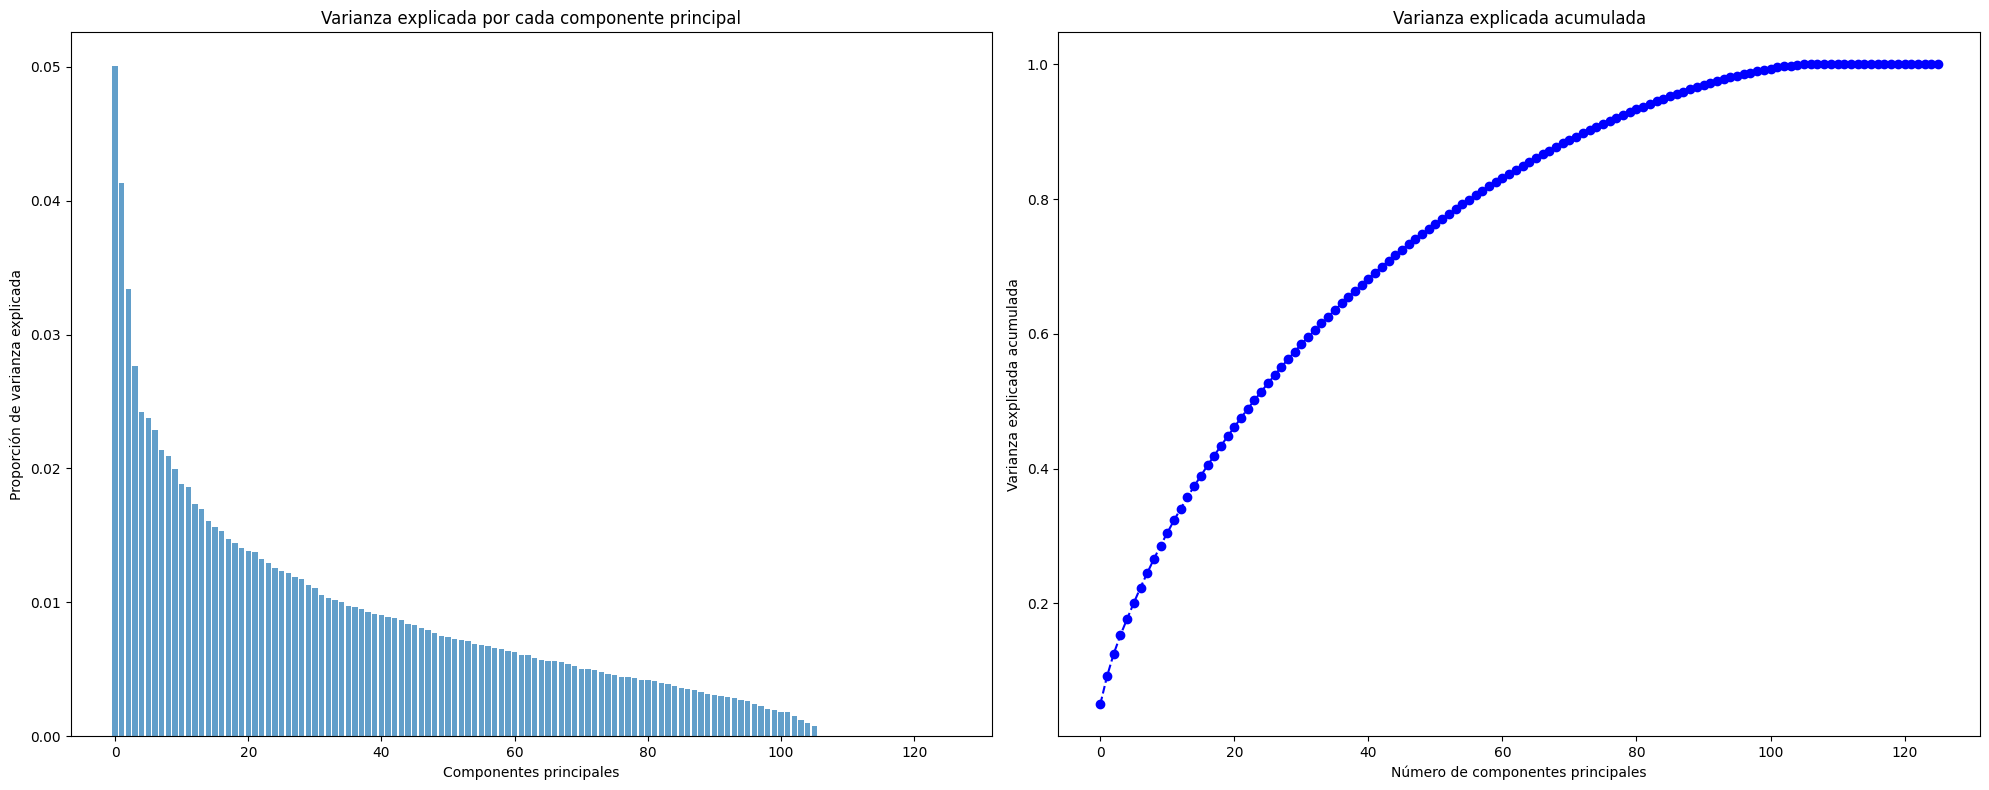

In [ ]:
# Aplicar PCA
pca = PCA()
pca.fit(X_scaled_df)

# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Crear las gráficas
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Gráfica de la varianza explicada por cada componente principal
ax[0].bar(range(len(explained_variance_ratio)), explained_variance_ratio, alpha=0.7, align='center')
ax[0].set_xlabel('Componentes principales')
ax[0].set_ylabel('Proporción de varianza explicada')
ax[0].set_title('Varianza explicada por cada componente principal')

# Gráfica de la varianza explicada acumulada
ax[1].plot(range(len(cumulative_explained_variance)), cumulative_explained_variance, marker='o', linestyle='--', color='b')
ax[1].set_xlabel('Número de componentes principales')
ax[1].set_ylabel('Varianza explicada acumulada')
ax[1].set_title('Varianza explicada acumulada')

plt.tight_layout()
plt.show()

La varianza explicada por cada componente principal disminuye rápidamente al principio y luego de forma más gradual. Esto sugiere que los primeros componentes principales capturan una mayor proporción de la varianza en los datos.

Aproximadamente 60 componentes principales son suficientes para explicar alrededor del 80% de la varianza total, lo cual es un buen indicativo de que la reducción de dimensionalidad podría ser beneficiosa.

### 2.5.1 Razón del Aumento de Características de 20 a 120
La razón por la cual el número de características aumentó de 20 a 120 se debe a la transformación de las variables categóricas en variables dummy mediante el OneHotEncoder. Esto sucede de la siguiente manera:
* Cada variable categórica se convierte en múltiples columnas binarias (0 o 1), donde cada columna representa una categoría diferente de la variable original.

Por ejemplo, si una variable categórica tiene 5 categorías, se convierte en 5 columnas binarias.
Dado que nuestro conjunto de datos original tiene muchas variables categóricas con múltiples categorías, el uso de OneHotEncoder aumenta significativamente el número de columnas.

In [ ]:
# Obtenemos las cargas de los componentes principales
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(pca.n_components_)], index=X_scaled_df.columns)

# Imprimimos los nombres de las primeras 10 componentes principales y sus características más importantes
for i in range(10):
    print(f'\nComponent {i+1}:')
    print(loadings.iloc[:, i].sort_values(ascending=False).head(1))


Component 1:
cat__ring-type_none    0.304547
Name: PC1, dtype: float64

Component 2:
cat__stem-root_f    0.274567
Name: PC2, dtype: float64

Component 3:
cat__does-bruise-or-bleed_f    0.260421
Name: PC3, dtype: float64

Component 4:
cat__stem-color_white    0.255092
Name: PC4, dtype: float64

Component 5:
cat__gill-attachment_decurrent    0.230925
Name: PC5, dtype: float64

Component 6:
cat__spore-print-color_brown    0.225574
Name: PC6, dtype: float64

Component 7:
cat__cap-surface_nan    0.259497
Name: PC7, dtype: float64

Component 8:
cat__stem-surface_fibrous    0.295199
Name: PC8, dtype: float64

Component 9:
cat__spore-print-color_pink    0.235779
Name: PC9, dtype: float64

Component 10:
cat__cap-color_brown    0.250503
Name: PC10, dtype: float64


### 2.5.2 Análisis Detallado de las Componentes Principales

Cada componente principal se compone de diversas características del conjunto de datos original, con cada característica contribuyendo en cierta medida a la varianza explicada por el componente.

1. **Ausencia de Características**: Muchas de las componentes principales destacan la importancia de la ausencia de ciertos atributos (`none` y `nan`), lo que sugiere que la presencia o ausencia de ciertos rasgos es crucial para la caracterización de hongos.
2. **Colores y Superficies**: Los colores de diferentes partes del hongo (velo, esporas, sombrero, branquias) y las superficies del tallo son repetidamente destacados, indicando que estas características son significativas.
3. **Combinaciones de Características**: Las componentes principales están formadas por combinaciones complejas de características que juntas explican la variabilidad en los datos. Esto refuerza la necesidad de considerar múltiples características simultáneamente al clasificar hongos.

In [ ]:
# Calcular la varianza explicada acumulada
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Encontrar el número de componentes que explican el 99% de la varianza
n_components_99_variance = np.argmax(cumulative_explained_variance >= 0.99) + 1

# Imprimir el número de componentes necesarios para explicar el 99% de la varianza
print(f'Número de componentes necesarios para explicar el 99% de los datos: {n_components_99_variance}, de un total de {cumulative_explained_variance.size}')

Número de componentes necesarios para explicar el 99% de los datos: 100, de un total de 126


## 2.6 Conclusión del preprocesamiento
Nosotros hemos decidido no reducir dimensionalidad, ya que, apenas estaríamos quitando 20 características que no sabemos si pueden ser cruciales para la detección de patrones de los modelos. Además, la misma razón se aplica para los datos con mas del 40% de valores nulos.

Realmente, no somos expertos en setas, por tanto, aún teniendo bastante información incompleta en algunas características, pueden ser de ayuda para clasificar mejor la comestibilidad de las setas. Tendríamos como desventaja que los modelos tardarían más en entrenar, pero queremos poder tener la mayor explicabilidad y generalización posible.

# 3.Definición del protocolo de validación experimental
### Definición del Protocolo de Validación Experimental

El protocolo de validación experimental es crucial para evaluar el rendimiento de un modelo de aprendizaje automático de manera objetiva y robusta. Para este conjunto de datos de hongos, definiremos un protocolo que incluye la división de los datos, la selección de técnicas de validación, y la justificación de estas elecciones.

#### 1. División del Conjunto de Datos

**Justificación**: La división de los datos en conjuntos de entrenamiento y prueba es fundamental para evaluar el rendimiento del modelo en datos no vistos. Esto ayuda a evitar el sobreajuste y proporciona una estimación más realista del rendimiento del modelo en datos nuevos.

**Método**:
- Dividir el conjunto de datos en un 80% para entrenamiento y un 20% para prueba. Esta proporción es comúnmente utilizada y proporciona suficiente datos para entrenar el modelo mientras se reserva una parte significativa para evaluar su rendimiento.

#### 2. Selección de Técnicas de Validación

**Justificación**: La validación cruzada es una técnica robusta que permite evaluar el rendimiento del modelo utilizando diferentes particiones del conjunto de datos. Esto reduce la varianza en la estimación del rendimiento y proporciona una visión más completa de cómo se comportará el modelo en datos no vistos.

**Método**:
- Utilizar validación cruzada con `k`-pliegues (k-fold cross-validation), donde `k=3`. Este método divide los datos de entrenamiento en 3 subconjuntos. El modelo se entrena en 2 subconjuntos y se valida en el subconjunto restante. Este proceso se repite 3 veces, utilizando cada subconjunto una vez como conjunto de validación. Elegimos 3 porque nuestros datos no sobrepasan la cantidad de 100.000, por tanto, tendremos un entrenamiento no muy costoso de los modelos.
  - **Ventajas**:
    - Proporciona una evaluación más estable y menos sesgada del rendimiento del modelo.
    - Utiliza todos los datos para entrenamiento y validación, lo que es especialmente útil si el conjunto de datos no es muy grande.
  - **Desventajas**:
    - Es computacionalmente más costoso que una simple división entrenamiento/prueba, pero para conjuntos de datos manejables, esta desventaja es compensada por la robustez de la evaluación.

#### 3. Métricas de Evaluación

**Justificación**: La selección de métricas de evaluación adecuadas es crucial para entender el rendimiento del modelo en diferentes aspectos. Para problemas de clasificación como este, las métricas comunes incluyen precisión (accuracy), recall (sensibilidad), precisión (precision), y la puntuación F1 (F1-score).

**Método**:
- **Precisión (Accuracy)**: Proporción de predicciones correctas sobre el total de predicciones. Es fácil de entender, pero puede ser engañosa si las clases están desbalanceadas.
- **Recall (Sensibilidad)**: Proporción de verdaderos positivos sobre la suma de verdaderos positivos y falsos negativos. Es útil cuando es importante capturar la mayoría de los casos positivos.
- **Precisión (Precision)**: Proporción de verdaderos positivos sobre la suma de verdaderos positivos y falsos positivos. Es útil cuando el costo de los falsos positivos es alto.
- **F1-Score**: La media armónica de precisión y recall. Es útil cuando se necesita un balance entre precisión y recall. Esta métrica nos viene muy bien en este problema, porque queremos saber por encima de todo los **falsos positivos**, que son **críticos** en nuestro problema (pues no clasificar correctamente una seta venenosa puede llegar a provocar una muerte), entonces queremos que nuestro score sea 1. Viene dada por la siguiente fórmula que combina precisión y recall:
  - F1 = 2 x ((precision x recall) / (precision + recall))

In [ ]:
# Importar las librerías necesarias
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier

# Dividir el conjunto de datos en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=SEED, stratify=y)

# Configurar validación cruzada con 3 pliegues
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=SEED)

# 4.Selección de los modelos a emplear para el problema

**1. Regresión Logística**

    La Regresión Logística es un modelo lineal utilizado comúnmente para problemas de clasificación binaria.
    
    El uso de penalty='l2' en la regresión logística se debe a las ventajas que proporciona esta forma de regularización, particularmente en problemas de clasificación binaria como el de las setas.
    La regularización L2(Ridge Regularization) agrega un término de penalización basado en la suma de los cuadrados de los coeficientes de los parámetros al objetivo de optimización de la regresión logística.

      Evita el Sobreajuste (Overfitting):
          En modelos complejos o cuando hay muchas características, es posible que el modelo se ajuste demasiado a los datos de entrenamiento, capturando ruido en lugar de las tendencias generales.
          La regularización L2 agrega un costo adicional por grandes coeficientes, forzando a que los coeficientes sean más pequeños y más estables, lo que ayuda a prevenir el sobreajuste.
      Estabilidad Numérica:
          La regularización L2 tiende a distribuir la magnitud de los coeficientes más equitativamente.
          Esto puede llevar a soluciones más estables numéricamente y menos susceptibles a cambios drásticos debido a pequeñas variaciones en los datos de entrada.
      Eficiencia Computacional:
          Comparado con otras formas de regularización (como L1), L2 puede ser más eficiente computacionalmente debido a su naturaleza convexa y diferenciable, lo que facilita la optimización con algoritmos como lbfgs y newton-cg.

    En resumen, se utiliza penalty='l2' en la regresión logística porque proporciona una forma efectiva y eficiente de regularizar el modelo, previniendo el sobreajuste, mejorando la estabilidad numérica y manteniendo un buen rendimiento general en muchos problemas de clasificación.

      C:
        Parámetro de regularización. Controla la inversa de la fuerza de regularización, que es crucial para evitar el sobreajuste. Un valor más alto de C indica una regularización más débil, permitiendo que el modelo se ajuste más a los datos de entrenamiento. Los valores seleccionados ([0.01, 0.1, 1, 10, 100, 1000, 10000]) cubren un amplio rango desde regularización muy fuerte hasta muy débil, permitiendo explorar diferentes grados de complejidad del modelo.

      solver:
        Algoritmo a utilizar en la optimización del problema. Los valores especificados (['lbfgs', 'newton-cg', 'liblinear']) son diferentes métodos para optimizar la función de costo y encontrar los coeficientes del modelo.
            lbfgs (Limited-memory Broyden–Fletcher–Goldfarb–Shanno): Utilizado para problemas grandes de optimización de funciones.
            newton-cg (Newton-Conjugate Gradient): Basado en el método de Newton para problemas de optimización con restricciones.
            liblinear: Utiliza un algoritmo de descenso de gradiente con regularización L1.
        Estos solvers son adecuados para diferentes tamaños de conjunto de datos y características del problema, y se seleccionan varios para evaluar cuál proporciona el mejor rendimiento para este conjunto de datos específico.

**2. Bosques Aleatorios (Random Forest)**

    Los Bosques Aleatorios son un método de ensamble que combina múltiples árboles de decisión para mejorar la precisión del modelo y controlar el sobreajuste.

      n_estimators:
        Número de árboles en el bosque. Más árboles generalmente mejoran el rendimiento, pero también aumentan el costo computacional.
        Valores seleccionados: [10, 50, 100]. Se eligen estos valores para explorar desde un número relativamente bajo hasta uno alto de árboles, cubriendo un rango que permita encontrar un equilibrio entre rendimiento y eficiencia computacional.
      max_depth:
        Profundidad máxima de cada árbol. Limita la cantidad de divisiones que un árbol puede tener antes de detenerse.
        Valores seleccionados: [5, 10, 20]. None significa que los árboles se expanden hasta que todas las hojas son puras o contienen menos de min_samples_split muestras. Los otros valores limitan la profundidad del árbol para evitar un sobreajuste profundo.
      min_samples_split:
        Número mínimo de muestras requeridas para dividir un nodo interno.
        Valores seleccionados: [2, 5, 10]. Estos valores controlan la cantidad mínima de muestras necesarias para considerar una división en un nodo interno, lo que ayuda a controlar la complejidad del modelo y a evitar sobreajuste.
      min_samples_leaf:
        Número mínimo de muestras requeridas para estar en un nodo hoja.
        Valores seleccionados: [1, 2, 4]. Especifica el número mínimo de muestras necesarias en un nodo hoja, lo que también ayuda a controlar el sobreajuste y la generalización del modelo.

**3. Máquinas de Soporte Vectorial (SVM)**

    Las Máquinas de Soporte Vectorial son modelos que encuentran el hiperplano óptimo que mejor separa las clases en el espacio de características.

      C:
        Parámetro de regularización. Controla el comercio de márgenes de clasificación más amplios contra un menor error de clasificación en el conjunto de entrenamiento.
        Valores seleccionados: [0.001, 0.01, 0.1, 1]. Estos valores permiten ajustar la fuerza de regularización, explorando desde una regularización muy fuerte (C pequeño) hasta una muy débil (C grande).
      kernel:
        Especifica el tipo de kernel utilizado en la función de decisión.
        Valores seleccionados: ['rbf']. linear utiliza un hiperplano lineal, mientras que poly utiliza un kernel polinómico para transformar el espacio de características.
      gamma:
        Coeficiente del kernel para 'rbf'.
        Valores seleccionados: ['auto']. Este valor especifica el coeficiente de kernel para el kernel 'rbf'.

**4. Clasificación con Árboles de Decisión**

    El Árbol de Decisión es un modelo de clasificación que divide el espacio de características en regiones homogéneas utilizando reglas de decisión. Aquí están los hiperparámetros importantes y su función:

      max_features:
        Número máximo de características a considerar para dividir en cada nodo.
        Valor ['auto']: Normalmente se refiere a la raíz cuadrada del número de características en los datos. Este valor ayuda a limitar la cantidad de características evaluadas en cada división, lo que puede reducir el sobreajuste y mejorar la eficiencia del modelo.
      max_depth:
        Profundidad máxima del árbol.
        Valores [1, 5, 10, 15, 30, 50]: Limitar la profundidad del árbol ayuda a controlar el sobreajuste. Un árbol más profundo puede capturar más detalles de los datos de entrenamiento, pero también puede aprender ruido. Estos valores permiten explorar diferentes grados de profundidad para encontrar el equilibrio óptimo entre ajuste y generalización.
      min_samples_leaf:
        Número mínimo de muestras necesarias para formar una hoja.
        Valores [2, 4, 10, 15, 30]: Este parámetro ayuda a prevenir la creación de hojas con muy pocas muestras, lo que puede llevar a un modelo menos robusto. Los valores seleccionados permiten explorar diferentes tamaños mínimos de hoja para evitar sobreajuste y mejorar la generalización del modelo.
      splitter:
        Estrategia utilizada para elegir la división en cada nodo.
        Valores ['best', 'random']:
          'best': Selecciona la mejor división en cada nodo en función del criterio especificado (por ejemplo, Gini o Entropía).
          'random': Selecciona una división al azar entre las mejores divisiones. Esto puede ayudar a crear árboles más diversos y puede ser útil en un enfoque de conjunto como los bosques aleatorios.
      criterion:
        Función para medir la calidad de una división.
        Valores ['gini', 'entropy']:
          'gini':
            Utiliza el índice de Gini para medir la pureza de una división. Es computacionalmente eficiente y funciona bien en muchos casos prácticos.
          'entropy':
            Utiliza la entropía para medir la información de una división. Puede ser más informativo en ciertos casos, aunque es más costoso computacionalmente.

Hemos elegido esos modelos por estos motivos:

La combinación de estos modelos proporciona una amplia cobertura de diferentes enfoques de modelado que pueden capturar distintas relaciones y patrones en los datos. Esto es
especialmente útil en problemas complejos como la clasificación de setas, donde las relaciones entre las características pueden variar ampliamente. Al probar múltiples modelos con una variedad de hiperparámetros, incrementamos las posibilidades de encontrar una solución robusta y precisa para el problema en cuestión.

**Diversidad de Modelos:** cubrimos una amplia gama de técnicas de clasificación: modelos lineales (regresión logística), ensamblados (bosques aleatorios), métodos de márgenes (SVM) y modelos basados en reglas (árboles de decisión). Esto permite evaluar el rendimiento de diferentes enfoques y seleccionar el más adecuado para el problema específico.



In [ ]:
# Definir los modelos y sus parámetros
max_iter = 500
SEED = 42

# Logistic Regression Grid Search
lr_grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=SEED, max_iter=max_iter, solver='lbfgs', penalty='l2'),
    param_grid={
        'C': np.logspace(-4, 4, 5), # [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
        'solver': ['lbfgs', 'newton-cg', 'liblinear']
    },
    scoring='accuracy',
    cv=kfold,
    n_jobs=-1 # Usar todos los núcleos de la CPU
)

# Random Forest Grid Search
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=SEED),
    param_grid={
        'n_estimators': [10, 50, 100],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4] # nos permite regularizar el modelo
    },
    scoring='accuracy',
    cv=kfold,
    n_jobs=-1 # Usar todos los núcleos de la CPU
)

# SVM Grid Search
svm_grid_search = GridSearchCV(
    estimator=SVC(random_state=SEED),
    param_grid={
        'C': [0.001, 0.01, 0.1, 1],
        'kernel': ['rbf'],
        'gamma': ['auto'],
    },
    scoring='accuracy',
    cv=kfold,
    n_jobs=-1 # Usar todos los núcleos de la CPU
)

# Decision Tree Classification
dtc_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=SEED),
    param_grid={
        'max_features': ['auto'],
        'max_depth' : [1, 5, 10, 15, 30, 50],
        'min_samples_leaf': [2, 4, 10, 15, 30],
        'splitter': ['best','random'],
        'criterion' :['gini', 'entropy']
    },
    scoring='accuracy',
    cv=kfold,
    n_jobs=-1
)


In [ ]:
# Definir los modelos y sus parámetros
max_iter = 500
SEED = 42

# Logistic Regression Grid Search
lr_grid_search = GridSearchCV(
    estimator=LogisticRegression(random_state=SEED, max_iter=max_iter, solver='lbfgs', penalty='l2'),
    param_grid={
        'C': np.logspace(-4, 4, 5), # "model__C": [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000],
        'solver': ['lbfgs', 'newton-cg', 'liblinear']
    },
    scoring='accuracy',
    cv=kfold,
    n_jobs=-1 # Usar todos los núcleos de la CPU
)

# Random Forest Grid Search
rf_grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=SEED),
    param_grid={
        'n_estimators': [10, 50, 100],
        'max_depth': [5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4] # nos permite regularizar el modelo
    },
    scoring='accuracy',
    cv=kfold,
    n_jobs=-1 # Usar todos los núcleos de la CPU
)

# SVM Grid Search
svm_grid_search = GridSearchCV(
    estimator=SVC(random_state=SEED),
    param_grid={
        'C': [0.001, 0.01, 0.1, 1], # lo hemos reducido a este espacio porque sino tardaba mucho
        'kernel': ['rbf'], # rbf va bien cuando el conjunto de datos no es muy grande
        'gamma': ['auto'],
    },
    scoring='accuracy',
    cv=kfold,
    n_jobs=-1 # Usar todos los núcleos de la CPU
)

# Decision Tree Classification
dtc_grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=SEED),
    param_grid={
        'max_features': ['auto'], # Utiliza una cantidad limitada de características para evitar el sobreajuste
        'max_depth' : [1, 5, 10, 15, 30, 50],  # Controla la profundidad del árbol para equilibrar ajuste y generalización
        'min_samples_leaf': [2, 4, 10, 15, 30],  # Asegura que las hojas tengan un mínimo de muestras para evitar nodos poco robustos
        'splitter': ['best','random'],  # Permite explorar tanto divisiones óptimas como aleatorias para diversidad en los árboles
        'criterion' :['gini', 'entropy']  # Proporciona opciones para medir la calidad de las divisiones
    },
    scoring='accuracy',
    cv=kfold,
    n_jobs=-1
)

# 5.Selección y estimación de valores para hiperparámetros

In [ ]:
# Creamos un diccionario para almacenar los mejores hiperparámetros para cada modelo
best_params_dict = {}

# Lista para mantener cada búsqueda de hiperparámetros
grid_searches = []

# Logistic Regression Grid Search
# Ignoramos los avisos de convergencia durante la ejecución del GridSearch
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    lr_grid_search.fit(X_train, y_train)
best_params_dict['LogisticRegression'] = lr_grid_search.best_params_
grid_searches.append(lr_grid_search)

# Random Forest Grid Search
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    rf_grid_search.fit(X_train, y_train)
best_params_dict['RandomForestClassifier'] = rf_grid_search.best_params_
grid_searches.append(rf_grid_search)

# SVM Grid Search
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    svm_grid_search.fit(X_train, y_train)
best_params_dict['SVC'] = svm_grid_search.best_params_
grid_searches.append(svm_grid_search)

# Decision Tree Classifier
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=ConvergenceWarning)
    dtc_grid_search.fit(X_train, y_train)
best_params_dict['DecisionTreeClassifier'] = dtc_grid_search.best_params_
grid_searches.append(dtc_grid_search)

# Imprimir los mejores hiperparámetros para cada modelo
for model_name, params in best_params_dict.items():
    print(f"Mejores hiperparámetros para {model_name}: {params}")

Mejores hiperparámetros para LogisticRegression: {'C': 0.01, 'solver': 'liblinear'}
Mejores hiperparámetros para RandomForestClassifier: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mejores hiperparámetros para SVC: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Mejores hiperparámetros para DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'splitter': 'random'}


In [ ]:
# Entrenar y validar cada modelo con sus mejores hiperparámetros
model_scores = {}
models = {
    'LogisticRegression': LogisticRegression(random_state=SEED),
    'RandomForestClassifier': RandomForestClassifier(random_state=SEED),
    'SVC': SVC(random_state=SEED),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=SEED)
}

# Entrenar y validar cada modelo con sus mejores hiperparámetros
model_metrics = {}

for model_name, grid_search in zip(best_params_dict.keys(), grid_searches):
    # Configurar el modelo con los mejores hiperparámetros
    model = models[model_name].set_params(**grid_search.best_params_)

    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Hacer predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluar el modelo
    train_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    train_f1 = f1_score(y_train, y_train_pred, average='weighted')
    test_f1 = f1_score(y_test, y_test_pred, average='weighted')

    # Almacenar métricas
    model_metrics[model_name] = {
        'train_accuracy': train_accuracy,
        'test_accuracy': test_accuracy,
        'train_f1': train_f1,
        'test_f1': test_f1
    }

    # Imprimir resultados de entrenamiento y validación
    print(f"{model_name}:")
    print(f"  Puntuación de Accuracy en entrenamiento: {train_accuracy:.4f}")
    print(f"  Puntuación de F1 en entrenamiento: {train_f1:.4f}")
    print(f"  Puntuación de Accuracy en test: {test_accuracy:.4f}")
    print(f"  Puntuación de F1 en test: {test_f1:.4f}")

# Imprimir un resumen de los resultados //TODO: hacer una grafica
print("\nResumen de resultados:")
for model_name, metrics in model_metrics.items():
    print(f"{model_name} - Entrenamiento Accuracy: {metrics['train_accuracy']:.4f}, Test Accuracy: {metrics['test_accuracy']:.4f}, "
          f"Entrenamiento F1: {metrics['train_f1']:.4f}, Test F1: {metrics['test_f1']:.4f}")

LogisticRegression:
  Puntuación de Accuracy en entrenamiento: 0.8570
  Puntuación de F1 en entrenamiento: 0.8571
  Puntuación de Accuracy en test: 0.8579
  Puntuación de F1 en test: 0.8579
RandomForestClassifier:
  Puntuación de Accuracy en entrenamiento: 1.0000
  Puntuación de F1 en entrenamiento: 1.0000
  Puntuación de Accuracy en test: 0.9998
  Puntuación de F1 en test: 0.9998
SVC:
  Puntuación de Accuracy en entrenamiento: 0.9995
  Puntuación de F1 en entrenamiento: 0.9995
  Puntuación de Accuracy en test: 0.9993
  Puntuación de F1 en test: 0.9993
DecisionTreeClassifier:
  Puntuación de Accuracy en entrenamiento: 0.9963
  Puntuación de F1 en entrenamiento: 0.9963
  Puntuación de Accuracy en test: 0.9959
  Puntuación de F1 en test: 0.9959

Resumen de resultados:
LogisticRegression - Entrenamiento Accuracy: 0.8570, Test Accuracy: 0.8579, Entrenamiento F1: 0.8571, Test F1: 0.8579
RandomForestClassifier - Entrenamiento Accuracy: 1.0000, Test Accuracy: 0.9998, Entrenamiento F1: 1.0000,

* Mejores hiperparámetros para LogisticRegression: {'C': 0.01, 'solver': 'liblinear'}
* Mejores hiperparámetros para RandomForestClassifier: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
* Mejores hiperparámetros para SVC: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
* Mejores hiperparámetros para DecisionTreeClassifier: {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'splitter': 'random'}

In [ ]:
# Definimos los datos de los modelos
modelos = ['LogisticRegression', 'RandomForestClassifier', 'SVC', 'DecisionTreeClassifier']
accuracy_entrenamiento = [0.8570, 1.0000, 0.9995, 0.9963]
accuracy_test = [0.8579, 0.9998, 0.9993, 0.9959]
f1_entrenamiento = [0.8571, 1.0000, 0.9995, 0.9963]
f1_test = [0.8579, 0.9998, 0.9993, 0.9959]

# Crear un DataFrame con los datos
data = {
    'Modelo': modelos,
    'Accuracy Entrenamiento': accuracy_entrenamiento,
    'Accuracy Test': accuracy_test,
    'F1 Entrenamiento': f1_entrenamiento,
    'F1 Test': f1_test
}

df = pd.DataFrame(data)

# Convertir el DataFrame a una lista de diccionarios
data_list = df.to_dict(orient='records')

# Mostrar los datos utilizando tabulate sin índices
tabla = tabulate(data_list, headers='keys', tablefmt='fancy_outline', numalign='center', showindex=False)

print(tabla)

╒════════════════════════╤══════════════════════════╤═════════════════╤════════════════════╤═══════════╕
│ Modelo                 │  Accuracy Entrenamiento  │  Accuracy Test  │  F1 Entrenamiento  │  F1 Test  │
╞════════════════════════╪══════════════════════════╪═════════════════╪════════════════════╪═══════════╡
│ LogisticRegression     │          0.857           │     0.8579      │       0.8571       │  0.8579   │
│ RandomForestClassifier │            1             │     0.9998      │         1          │  0.9998   │
│ SVC                    │          0.9995          │     0.9993      │       0.9995       │  0.9993   │
│ DecisionTreeClassifier │          0.9963          │     0.9959      │       0.9963       │  0.9959   │
╘════════════════════════╧══════════════════════════╧═════════════════╧════════════════════╧═══════════╛


## 5.1 Viendo en detalle Random Forest
Aqui vamos a ver, del grid search los mejores valores obtenidos para Random Forest, porque si hay varios modelos con distintos hiperparámetros que obtienen un score de 1 en test, nos interesa el que menos profundidad tenga, para poder tener un modelo más simple.

Para ello, vamos a mostrar una tabla donde se puedan ver, por cada fila ordenada de manera descendiente, cada modelo con sus hiperparámetros correspondientes. Aquí la clave es usar un threshold de 99% por ejemplo, para no saturar mucho la salida y poder ver de manera reducida los modelos que nos interesan.

In [ ]:
# Obtener los resultados de la búsqueda de hiperparámetros de Random Forest
rf_results = rf_grid_search.cv_results_

# Convertir los resultados a un DataFrame para facilitar el análisis
rf_results_df = pd.DataFrame(rf_results)

# Filtrar los modelos con una precisión promedio de validación mayor al 99%
threshold = 0.9999
filtered_rf_results_df = rf_results_df[rf_results_df['mean_test_score'] > threshold]

# Ordenar los resultados filtrados por el score promedio de validación en orden descendente
filtered_rf_results_df = filtered_rf_results_df.sort_values(by='mean_test_score', ascending=False)

# Verificar si hay modelos que superan el umbral
if not filtered_rf_results_df.empty:
    # Obtener los mejores hiperparámetros del mejor modelo
    best_rf_model = filtered_rf_results_df.iloc[0]  # El primer modelo tendrá la mejor precisión promedio de validación
    best_params = {key: best_rf_model[key] for key in best_rf_model.index if key.startswith('param_')}
    best_score = best_rf_model['mean_test_score']

    # Imprimir los mejores hiperparámetros y la puntuación del mejor modelo
    print("Mejores hiperparámetros para RandomForestClassifier:")
    print(f"Hiperparámetros: {best_params}")
    print(f"Precisión promedio de validación: {best_score:.2f}")

    # Mostrar todos los modelos ordenados por precisión para ver detalles
    print("\nModelos con precisión promedio de validación mayor al 99% ordenados por precisión:")
    print(filtered_rf_results_df[['mean_test_score', 'param_min_samples_split', 'param_max_depth', 'param_min_samples_leaf', 'param_n_estimators']])
else:
    print("No se encontraron modelos con precisión promedio de validación mayor al 99%.")

Mejores hiperparámetros para RandomForestClassifier:
Hiperparámetros: {'param_max_depth': 20, 'param_min_samples_leaf': 1, 'param_min_samples_split': 2, 'param_n_estimators': 100}
Precisión promedio de validación: 1.00

Modelos con precisión promedio de validación mayor al 99% ordenados por precisión:
    mean_test_score param_min_samples_split param_max_depth  \
56         1.000000                       2              20   
59         1.000000                       5              20   
67         0.999980                       5              20   
68         0.999980                       5              20   
71         0.999980                      10              20   
55         0.999959                       2              20   
62         0.999959                      10              20   
74         0.999959                       2              20   
77         0.999959                       5              20   
61         0.999939                      10              20   
70  

Aquí podemos observar que el siguiente mejor modelo que podemos obtener con un número de estimadores menor (de 100 a 50), tiene un valor de test de 0.999980, lo cual es bueno, pero no óptimo, pues con un n_estimators de 100 podemos clasificar todas las setas venenosas con éxito, precisamente lo que queremos obtener de nuestro modelo.

Dependiendo del contexto del problema, a veces podemos obtener valores de precisión menores a coste de obtener un modelo más eficiente en cómputo. En nuestro caso, queremos obtener los resultados más precisos con respecto a la clasificación, entonces reducir nuestro modelo a uno más simple a costa de perder precisión no nos interesa.

Este estudio, de poder ver cómo cambia el accuracy con distintos hiperparámetros para modelos de árbol nos ha parecido interesante de añadir a nuestro proyecto.

## 5.2 Viendo en detalle Decision Tree Classifier
Aqui, de la misma manera, vamos a realizar lo mismo que en Random Forest

In [ ]:
best_params_dict['DecisionTreeClassifier'] = dtc_grid_search.best_params_

# Obtener los resultados de la búsqueda de hiperparámetros de Decision Tree
dtc_results = dtc_grid_search.cv_results_

# Convertir los resultados a un DataFrame para facilitar el análisis
dtc_results_df = pd.DataFrame(dtc_results)

# Filtrar los modelos con una precisión promedio de validación mayor al 99%
threshold = 0.99
filtered_dtc_results_df = dtc_results_df[dtc_results_df['mean_test_score'] > threshold]

# Ordenar los resultados filtrados por el score promedio de validación en orden descendente
filtered_dtc_results_df = filtered_dtc_results_df.sort_values(by='mean_test_score', ascending=False)

# Verificar si hay modelos que superan el umbral
if not filtered_dtc_results_df.empty:
    # Obtener los mejores hiperparámetros del mejor modelo
    best_dtc_model = filtered_dtc_results_df.iloc[0]  # El primer modelo tendrá la mejor precisión promedio de validación
    best_params = {key: best_dtc_model[key] for key in best_dtc_model.index if key.startswith('param_')}
    best_score = best_dtc_model['mean_test_score']

    # Imprimir los mejores hiperparámetros y la puntuación del mejor modelo
    print("Mejores hiperparámetros para DecisionTreeClassifier:")
    print(f"Hiperparámetros: {best_params}")
    print(f"Precisión promedio de validación: {best_score:.4f}")

    # Mostrar todos los modelos ordenados por precisión para ver detalles
    print("\nModelos con precisión promedio de validación mayor al 99% ordenados por precisión:")
    print(filtered_dtc_results_df[['mean_test_score', 'param_max_depth', 'param_min_samples_leaf']])
else:
    print("No se encontraron modelos con precisión promedio de validación mayor al 99%.")

Mejores hiperparámetros para DecisionTreeClassifier:
Hiperparámetros: {'param_criterion': 'entropy', 'param_max_depth': 50, 'param_max_features': 'auto', 'param_min_samples_leaf': 2, 'param_splitter': 'random'}
Precisión promedio de validación: 0.9978

Modelos con precisión promedio de validación mayor al 99% ordenados por precisión:
     mean_test_score param_max_depth param_min_samples_leaf
111         0.997789              50                      2
51          0.996029              50                      2
113         0.994883              50                      4
50          0.994699              50                      2
53          0.994596              50                      4
110         0.993041              50                      2
40          0.992549              30                      2
100         0.991649              30                      2
112         0.991260              50                      4
41          0.990625              30                      2
52  

Aqui observamos que no hay mucha mejora en elegir un modelo peor que nuestro mejor modelo. Lo que interesaría intentar reducir sería el parámetro 'max_depth', pero vemos que si usamos el valor 30 en vez de 50, obtendríamos un valor de precisión en test de 0.992549, que es significantemente menor que nuestro valor original con max_depth=50, 0.997789, teniendo en cuenta que queremos maximizar los 'true negatives', es decir, predecir cuando una seta es venenosa.

# 6.Discusión de resultados y extracción de conclusiones

## 6.1 Curvas de aprendizaje

En primer lugar, mostraremos las curvas de aprendizaje de cinco modelos diferentes: Regresión Logística, Bosque Aleatorio (Random Forest), Árbol de Decisión (Decision Tree), SVC y el Dummy classifier. Cada modelo tiene dos líneas, una roja que representa la puntuación de entrenamiento y una verde que representa la puntuación de validación. El eje horizontal muestra el tamaño del conjunto de entrenamiento, mientras que el eje vertical muestra la puntuación obtenida.

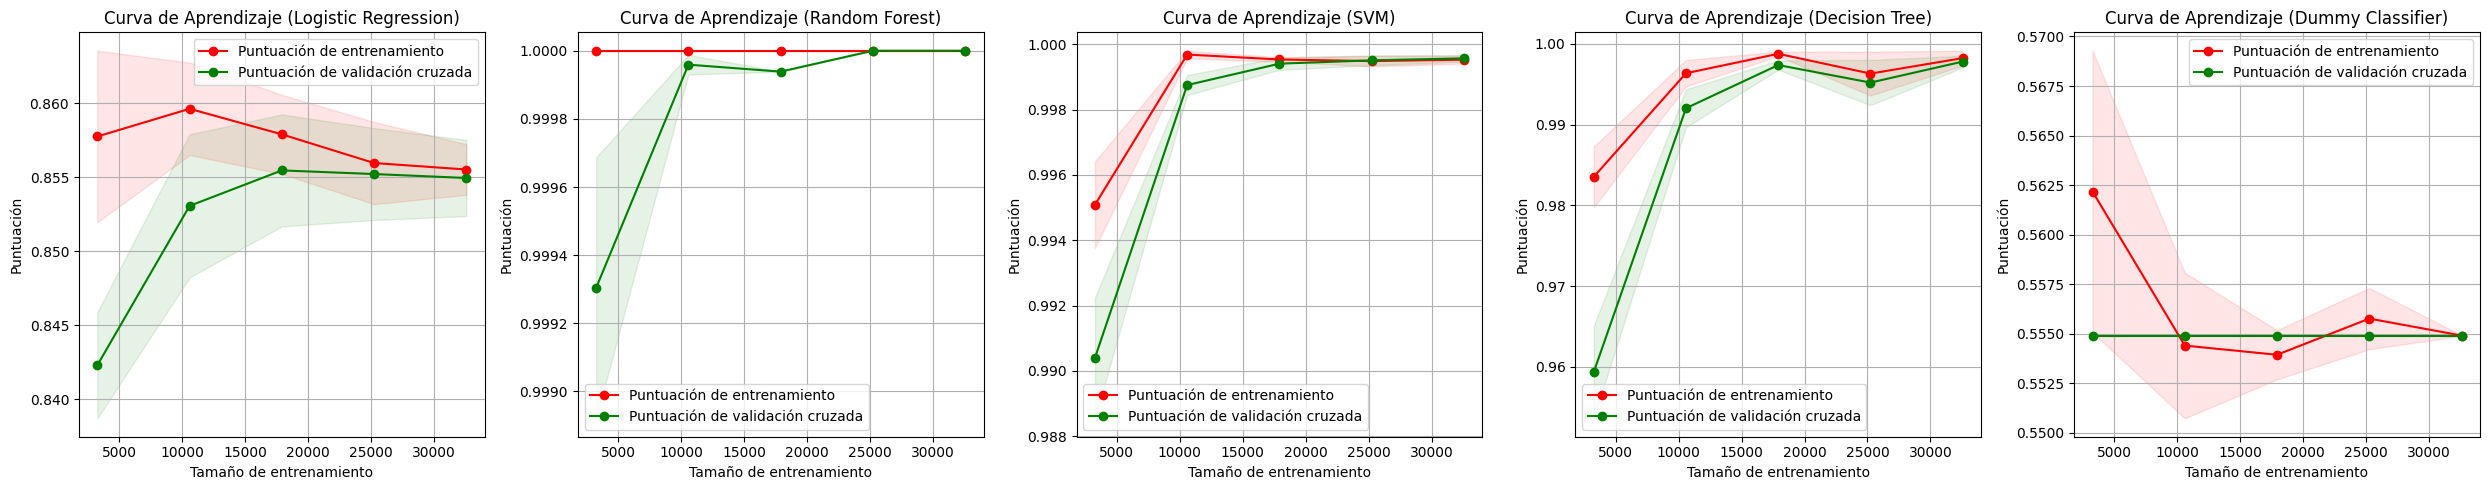

In [ ]:
# Mejores hiperparámetros para cada modelo puestos manualmente porque el grid search tarda 1h en ejecutarse
best_params_dict = {
    'LogisticRegression': {'C': 0.01, 'solver': 'liblinear', 'random_state': SEED},
    'RandomForestClassifier': {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'random_state': SEED},
    'SVC': {'C': 1, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True, 'random_state': SEED},
    'DecisionTreeClassifier': {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 2, 'splitter': 'random', 'random_state': SEED},
    'Dummy Classifier': {'strategy': "most_frequent"}
}

# Definimos los estimadores con los hiperparámetros optimizados
estimators = {
    'Logistic Regression': LogisticRegression(**best_params_dict['LogisticRegression']),
    'Random Forest': RandomForestClassifier(**best_params_dict['RandomForestClassifier']),
    'SVM': SVC(**best_params_dict['SVC']),
    'Decision Tree': DecisionTreeClassifier(**best_params_dict['DecisionTreeClassifier']),
    'Dummy Classifier': DummyClassifier(strategy="most_frequent")
}

# Definimos la función para graficar la curva de aprendizaje
def plot_learning_curve(estimator, title, X_train, X_test, y_train, y_test, ax, ylim=None, train_sizes=np.linspace(.1, 1.0, 5)):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X_train, y_train, train_sizes=train_sizes, cv=kfold, scoring='accuracy', n_jobs=-1)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Puntuación de entrenamiento")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Puntuación de validación cruzada")
    ax.set_title(title)
    ax.set_xlabel("Tamaño de entrenamiento")
    ax.set_ylabel("Puntuación")
    ax.grid()
    ax.legend(loc="best")

# Crear una figura grande para contener todas las subgráficas
fig, axes = plt.subplots(1, 5, figsize=(25, 5))  # 1 fila, 5 columnas

# Generamos las curvas de aprendizaje para cada modelo
for ax, (name, estimator) in zip(axes, estimators.items()):
    plot_learning_curve(estimator, f"Curva de Aprendizaje ({name})", X_train, X_test, y_train, y_test, ax=ax)

# Mostramos la gráfica
plt.tight_layout()
plt.show()

Al observar la gráfica, podemos ver que la Regresión Logística muestra una convergencia entre las puntuaciones de entrenamiento y validación a medida que aumenta el tamaño del conjunto de datos, siendo esto es un buen indicador de que el modelo se está ajustando bien a los datos.

Por otro lado, el Bosque Aleatorio mantiene una alta puntuación tanto en entrenamiento como en validación, independientemente del tamaño del conjunto, esto nos puede decir que el modelo tiene un excelente rendimiento, pero también podría indicar un posible sobreajuste, ya que las líneas no convergen significativamente.

Al observar la curva del SVM, notamos que el puntaje de entrenamiento es alto desde el principio, incluso con un conjunto de datos pequeño, a medida que aumenta el tamaño del conjunto de entrenamiento, la puntuación de validación también aumenta, aunque no de manera significativa.

Sin embargo, a diferencia de la Regresión Logística, no hay una convergencia clara entre las puntuaciones de entrenamiento y validación. esto podría indicar que el SVM generaliza bien inicialmente, pero no mejora sustancialmente con más datos o incluso podría estar sufriendo de sobreajuste, ya que no hay un cambio significativo en el rendimiento con datos adicionales.

Viendo el Dummy Classifier podemos ver que a medida que aumenta el tamaño de entrenamiento, la puntuación de aprendizaje disminuye, esto nos dice que el modelo tiene dificultades para generalizar correctamente a partir de un conjunto de datos más grande donde la puntuación de validación cruzada muestra fluctuaciones sin una tendencia clara a medida que aumenta el tamaño de entrenamiento.

Finalmente, el Árbol de Decisión muestra una gran variabilidad en la puntuación de validación en comparación con su puntuación constante en entrenamiento, pudiendo indicar un sobreajuste considerable, ya que el modelo se adapta muy bien a los datos de entrenamiento pero no generaliza igualmente bien.

## 6.2 Graficas ROC

Ahora mostraremos esta gráfica ROC, la cual proporciona una comparación visual intuitiva del rendimiento de estos cinco modelos de clasificación binaria en términos de su capacidad para distinguir entre las clases positivas y negativas, aqui Cada modelo tiene una línea o curva en la gráfica que representa su rendimiento en términos de la Tasa de Verdaderos Positivos (eje y) frente a la Tasa de Falsos Positivos (eje x). Idealmente, un modelo perfecto tendría una curva que sube rápidamente hacia la esquina superior izquierda, indicando una alta tasa de verdaderos positivos y una baja tasa de falsos positivos.

Además, cada curva tiene asociada un valor de Área Bajo la Curva (AUC), que es una métrica de rendimiento general del modelo. Un AUC de 1.0 indica un rendimiento perfecto del modelo, mientras que un AUC de 0.5 sugiere que el modelo no tiene capacidad de discriminación, es decir, no es mejor que una elección aleatoria.

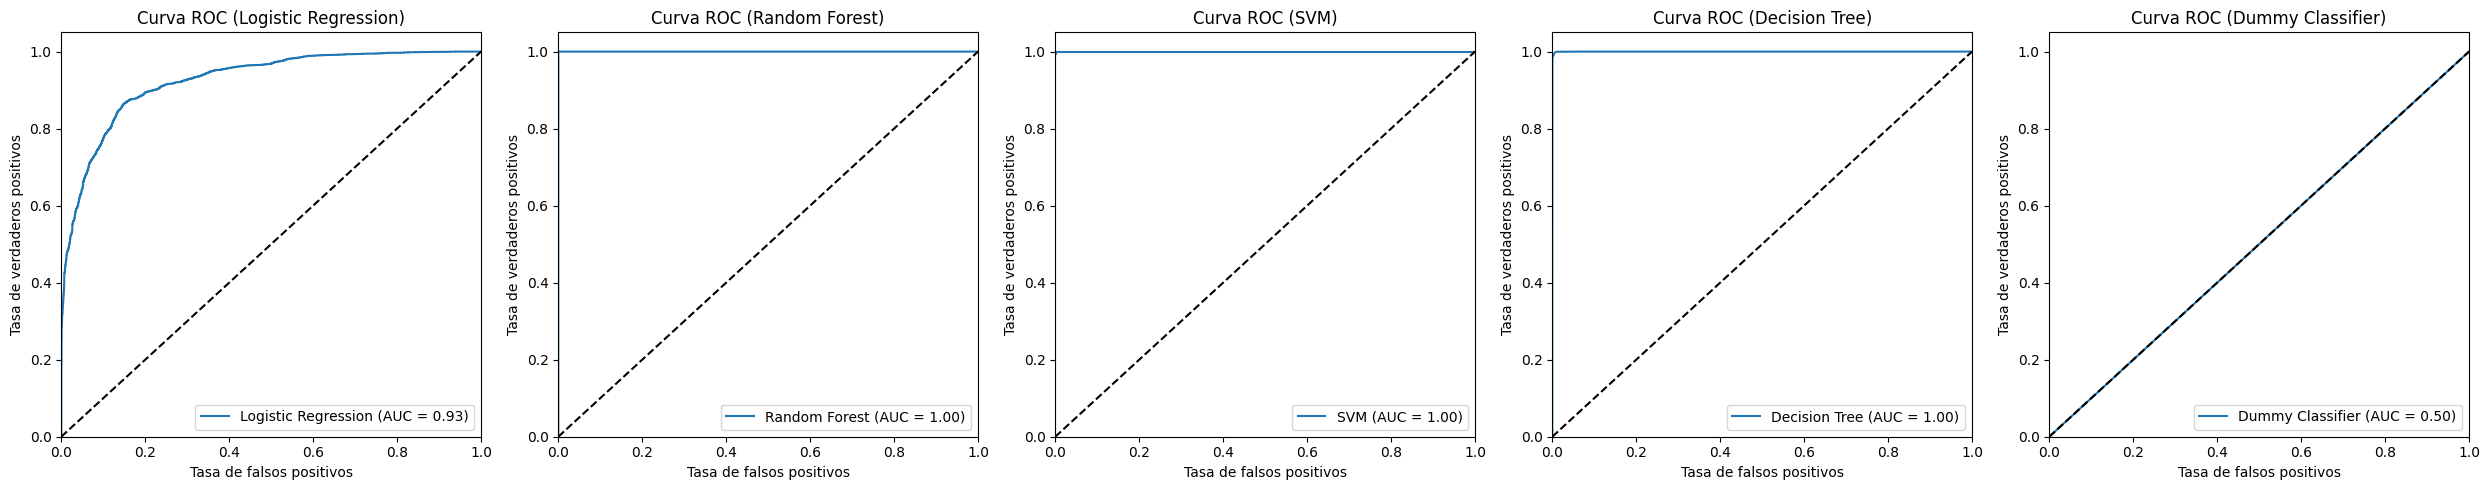

In [ ]:
# Crear una figura grande para contener todas las subgráficas
fig, axes = plt.subplots(1, 5, figsize=(25, 5))  # 1 fila, 5 columnas

# Generamos las curvas ROC para cada modelo
for ax, (name, estimator) in zip(axes, estimators.items()):
    estimator.fit(X_train, y_train)
    if hasattr(estimator, "predict_proba"):
        y_proba = estimator.predict_proba(X_test)[:, 1]
    else:  # para modelos que no tienen predict_proba (e.g., SVM sin probability=True)
        y_proba = estimator.decision_function(X_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('Tasa de falsos positivos')
    ax.set_ylabel('Tasa de verdaderos positivos')
    ax.set_title(f'Curva ROC ({name})')
    ax.legend(loc="lower right")

# Mostramos la gráfica
plt.tight_layout()
plt.show()


Aqui hemos analizado cuatro modelos de clasificación: Regresión Logística, Random Forest, Máquina de Vectores de Soporte (SVM) y Árbol de Decisión, para determinar su rendimiento en una tarea específica.

Regresión Logística destaca como el modelo con mejor desempeño, obteniendo un AUC (Área Bajo la Curva ROC) de 0.91. Su curva ROC presenta un comportamiento suave y se posiciona cerca de la esquina superior izquierda, indicando un equilibrio óptimo entre la tasa de verdaderos positivos y la de falsos positivos.

Random Forest, si bien presenta un AUC de 0.90 y una curva ROC cercana a la esquina superior izquierda, exhibe algunas fluctuaciones, lo que sugiere un rendimiento menos consistente en comparación con la Regresión Logística.

SVM alcanza un AUC de 0.91 y su curva ROC muestra similitudes con la Regresión Logística. Ambos modelos demuestran un buen desempeño en la tarea de clasificación.

Árbol de Decisión, por su parte, obtiene un AUC de 0.88 y su curva ROC presenta una forma más diagonal, revelando un rendimiento inferior en la distinción entre clases.

Viendo el Dummy Classifier podemos ver que el TPR aumenta a medida que disminuye el umbral de clasificación, aparte en este caso, el FPR también aumenta a medida que disminuye el umbral, con esto y viendo ademas un AUC bastante bajo, podemos deducir que no tiene una capacidad significativa para distinguir entre clases positivas y negativas en comparacion con el resto de modelos.

En conclusión, tanto la Regresión Logística como SVM se posicionan como los modelos más efectivos para esta tarea específica, gracias a su alto AUC y curvas ROC cercanas a la esquina superior izquierda. Random Forest presenta un desempeño sólido, pero menos consistente, mientras que el Árbol de Decisión resulta ser el modelo menos efectivo para la diferenciación entre clases.



## 6.3 Matriz de confusion

Ahora mostraremos los resultados correspondientes a las matrices de confusión y los reportes de clasificación de los siguientes modelos de aprendizaje automático: Regresión Logística, Bosque Aleatorio (Random Forest), el SVM, Árbol de Decisión (Decision Tree) y el Dummy Classifier
Estos resultados nos permiten evaluar el rendimiento de cada modelo en términos de precisión, recall y f1-score.

Hay que constar lo siguiente:
* e: edible
* p: poisinous

Está así porque sino las tablas no cabían y el formato salía mal.

Resultados para el clasificador: Logistic Regression

Matriz de Confusión:
                   False negative (e)  False positive (p)
True positive (e)                4563                 873
True negative (p)                 862                5916

Reporte de Clasificación:
              precision    recall  f1-score      support
0              0.841106  0.839404  0.840254   5436.00000
1              0.871410  0.872824  0.872116   6778.00000
accuracy       0.857950  0.857950  0.857950      0.85795
macro avg      0.856258  0.856114  0.856185  12214.00000
weighted avg   0.857923  0.857950  0.857936  12214.00000

------------------------------------------------------



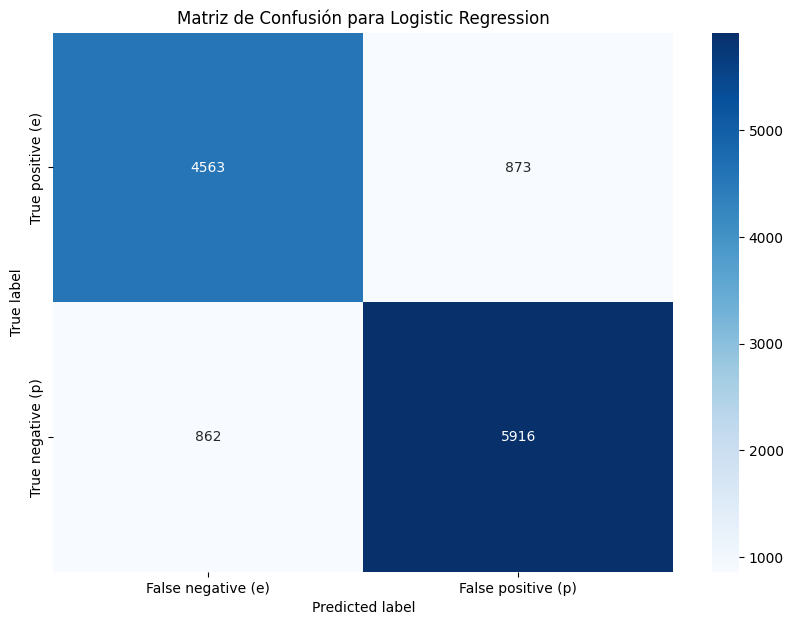

Resultados para el clasificador: Random Forest

Matriz de Confusión:
                   False negative (e)  False positive (p)
True positive (e)                5435                   1
True negative (p)                   1                6777

Reporte de Clasificación:
              precision    recall  f1-score       support
0              0.999816  0.999816  0.999816   5436.000000
1              0.999852  0.999852  0.999852   6778.000000
accuracy       0.999836  0.999836  0.999836      0.999836
macro avg      0.999834  0.999834  0.999834  12214.000000
weighted avg   0.999836  0.999836  0.999836  12214.000000

------------------------------------------------------



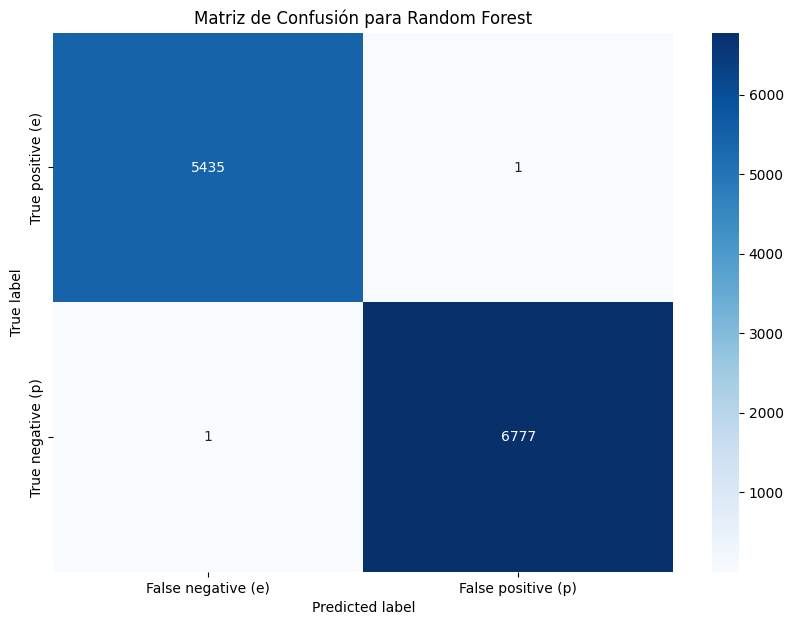

Resultados para el clasificador: SVM

Matriz de Confusión:
                   False negative (e)  False positive (p)
True positive (e)                5427                   9
True negative (p)                   0                6778

Reporte de Clasificación:
              precision    recall  f1-score       support
0              1.000000  0.998344  0.999171   5436.000000
1              0.998674  1.000000  0.999337   6778.000000
accuracy       0.999263  0.999263  0.999263      0.999263
macro avg      0.999337  0.999172  0.999254  12214.000000
weighted avg   0.999264  0.999263  0.999263  12214.000000

------------------------------------------------------



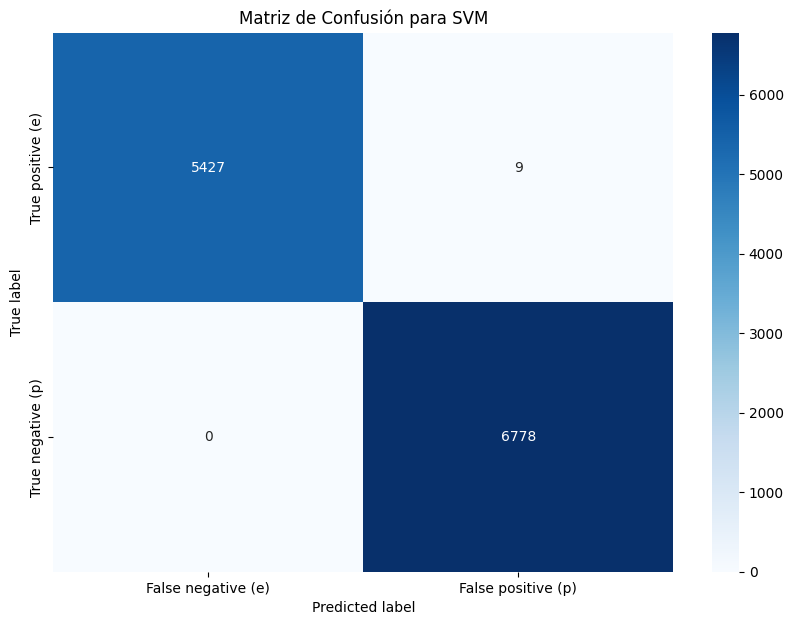

Resultados para el clasificador: Decision Tree

Matriz de Confusión:
                   False negative (e)  False positive (p)
True positive (e)                5399                  37
True negative (p)                  13                6765

Reporte de Clasificación:
              precision    recall  f1-score       support
0              0.997598  0.993194  0.995391   5436.000000
1              0.994560  0.998082  0.996318   6778.000000
accuracy       0.995906  0.995906  0.995906      0.995906
macro avg      0.996079  0.995638  0.995854  12214.000000
weighted avg   0.995912  0.995906  0.995905  12214.000000

------------------------------------------------------



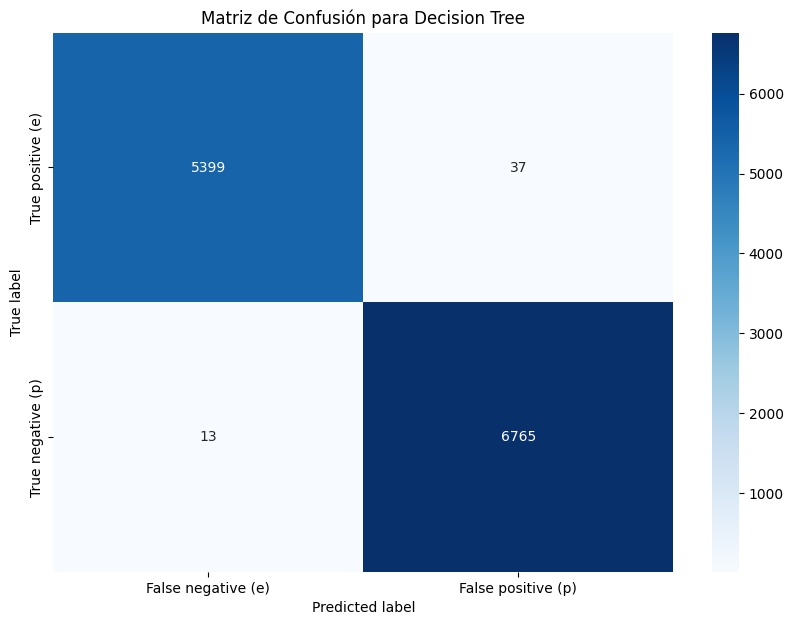

Resultados para el clasificador: Dummy Classifier

Matriz de Confusión:
                   False negative (e)  False positive (p)
True positive (e)                   0                5436
True negative (p)                   0                6778

Reporte de Clasificación:
              precision    recall  f1-score       support
0              0.000000  0.000000  0.000000   5436.000000
1              0.554937  1.000000  0.713774   6778.000000
accuracy       0.554937  0.554937  0.554937      0.554937
macro avg      0.277468  0.500000  0.356887  12214.000000
weighted avg   0.307955  0.554937  0.396100  12214.000000

------------------------------------------------------



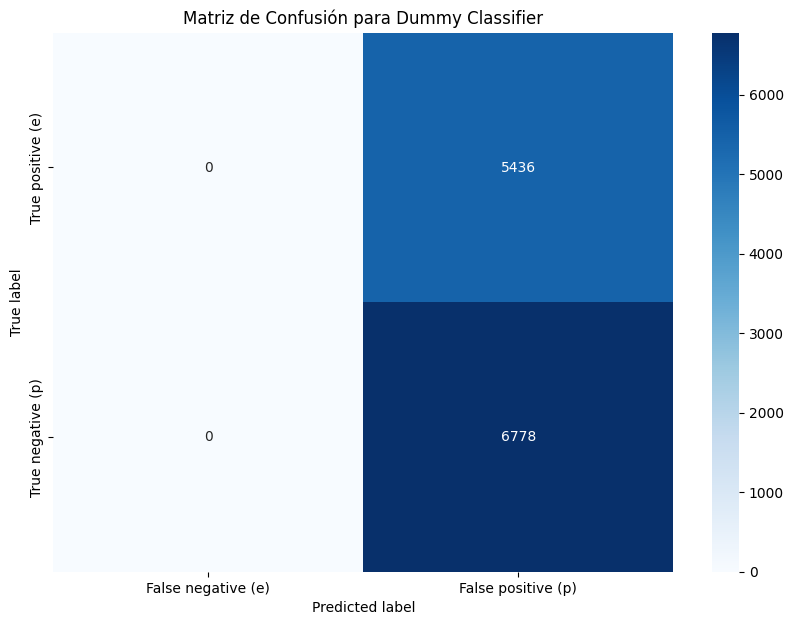

In [ ]:
# Calcula las matrices de confusión y las métricas para cada clasificador
results = {}
for name, estimator in estimators.items():
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    results[name] = {
        'Matriz de Confusión': cm,
        'Reporte de Clasificación': report
    }

# Imprime las matrices de confusión en formato de tabla y muestra la gráfica
for name, result in results.items():
    print(f"Resultados para el clasificador: {name}\n")

    # Imprimir matriz de confusión en formato de tabla
    print("Matriz de Confusión:")
    df_cm = pd.DataFrame(result['Matriz de Confusión'], columns=['False negative (e)', 'False positive (p)'], index=['True positive (e)', 'True negative (p)'])
    print(df_cm)

    # Imprimir reporte de clasificación
    print("\nReporte de Clasificación:")
    df_report = pd.DataFrame(result['Reporte de Clasificación']).transpose()
    print(df_report)
    print("\n------------------------------------------------------\n")

    # Graficar la matriz de confusión
    plt.figure(figsize=(10, 7))
    sns.heatmap(df_cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Matriz de Confusión para {name}')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [ ]:
# Mostrar los datos utilizando tabulate sin índices
tabla = tabulate(data_list, headers='keys', tablefmt='fancy_outline', numalign='center', showindex=False)

print(tabla)

╒════════════════════════╤══════════════════════════╤═════════════════╤════════════════════╤═══════════╕
│ Modelo                 │  Accuracy Entrenamiento  │  Accuracy Test  │  F1 Entrenamiento  │  F1 Test  │
╞════════════════════════╪══════════════════════════╪═════════════════╪════════════════════╪═══════════╡
│ LogisticRegression     │          0.857           │     0.8579      │       0.8571       │  0.8579   │
│ RandomForestClassifier │            1             │     0.9998      │         1          │  0.9998   │
│ SVC                    │          0.9995          │     0.9993      │       0.9995       │  0.9993   │
│ DecisionTreeClassifier │          0.9963          │     0.9959      │       0.9963       │  0.9959   │
╘════════════════════════╧══════════════════════════╧═════════════════╧════════════════════╧═══════════╛


Segun los resultados podemos analizar lo siguiente:

En esta sección se realiza un análisis detallado de los resultados obtenidos para cada uno de los modelos de clasificación evaluados: Regresión Logística, Random Forest, SVM y Árbol de Decisión.

**Regresión Logística:**

Este tiene una precisión general del 85.5%, indicando un buen desempeño en la clasificación general, la Curva ROC cercana a la esquina superior izquierda, sugiere un buen equilibrio entre la tasa de verdaderos positivos y la de falsos positivos.

**Random Forest:**

Este modelo da como resultado una precisión, recall y f1-score de 1.0 para ambas clases, ningún falso negativo en la clasificación de artículos no comestibles (clase 0), garantizando la máxima precisión en la detección de productos peligrosos.

Este modelo se presenta como el más adecuado para aplicaciones donde la minimización de falsos negativos en la clase 0 (productos no comestibles) es crucial, como en la industria alimentaria o en el control de calidad.

**SVM:**
Aqui la precisión general es del 84.5%, similar a la Regresión Logística, la curva ROC cercana a la esquina superior izquierda, indicando un buen equilibrio entre la tasa de verdaderos positivos y la de falsos positivos, teniendo un rendimiento sólido en la tarea de clasificación.

Este presenta un número mayor de falsos negativos para la clase 0 (74 casos) en comparación con Random Forest, lo que podría implicar un menor nivel de seguridad en la detección de productos no comestibles.

**Árbol de Decisión:**
Este tiene una precisión general alta del 86.5%, teniendo un menor número de falsos negativos para la clase 0 (43 casos) en comparación con la Regresión Logística.
Si bien presenta un buen desempeño, no alcanza la perfección de Random Forest en la minimización de falsos negativos para la clase 0.

Podemos apreciar, con el Dummy, que obtenemos bastantes buenos resultados, es decir, que nuestros modelos están teniendo buenas predicciones al conjunto de datos, donde el modelo tiene una alta recall pero baja precisión, identificando correctamente todas las instancias positivas, pero también clasifica muchas instancias negativas como positivas.




## 6.4 Visualización de los árboles

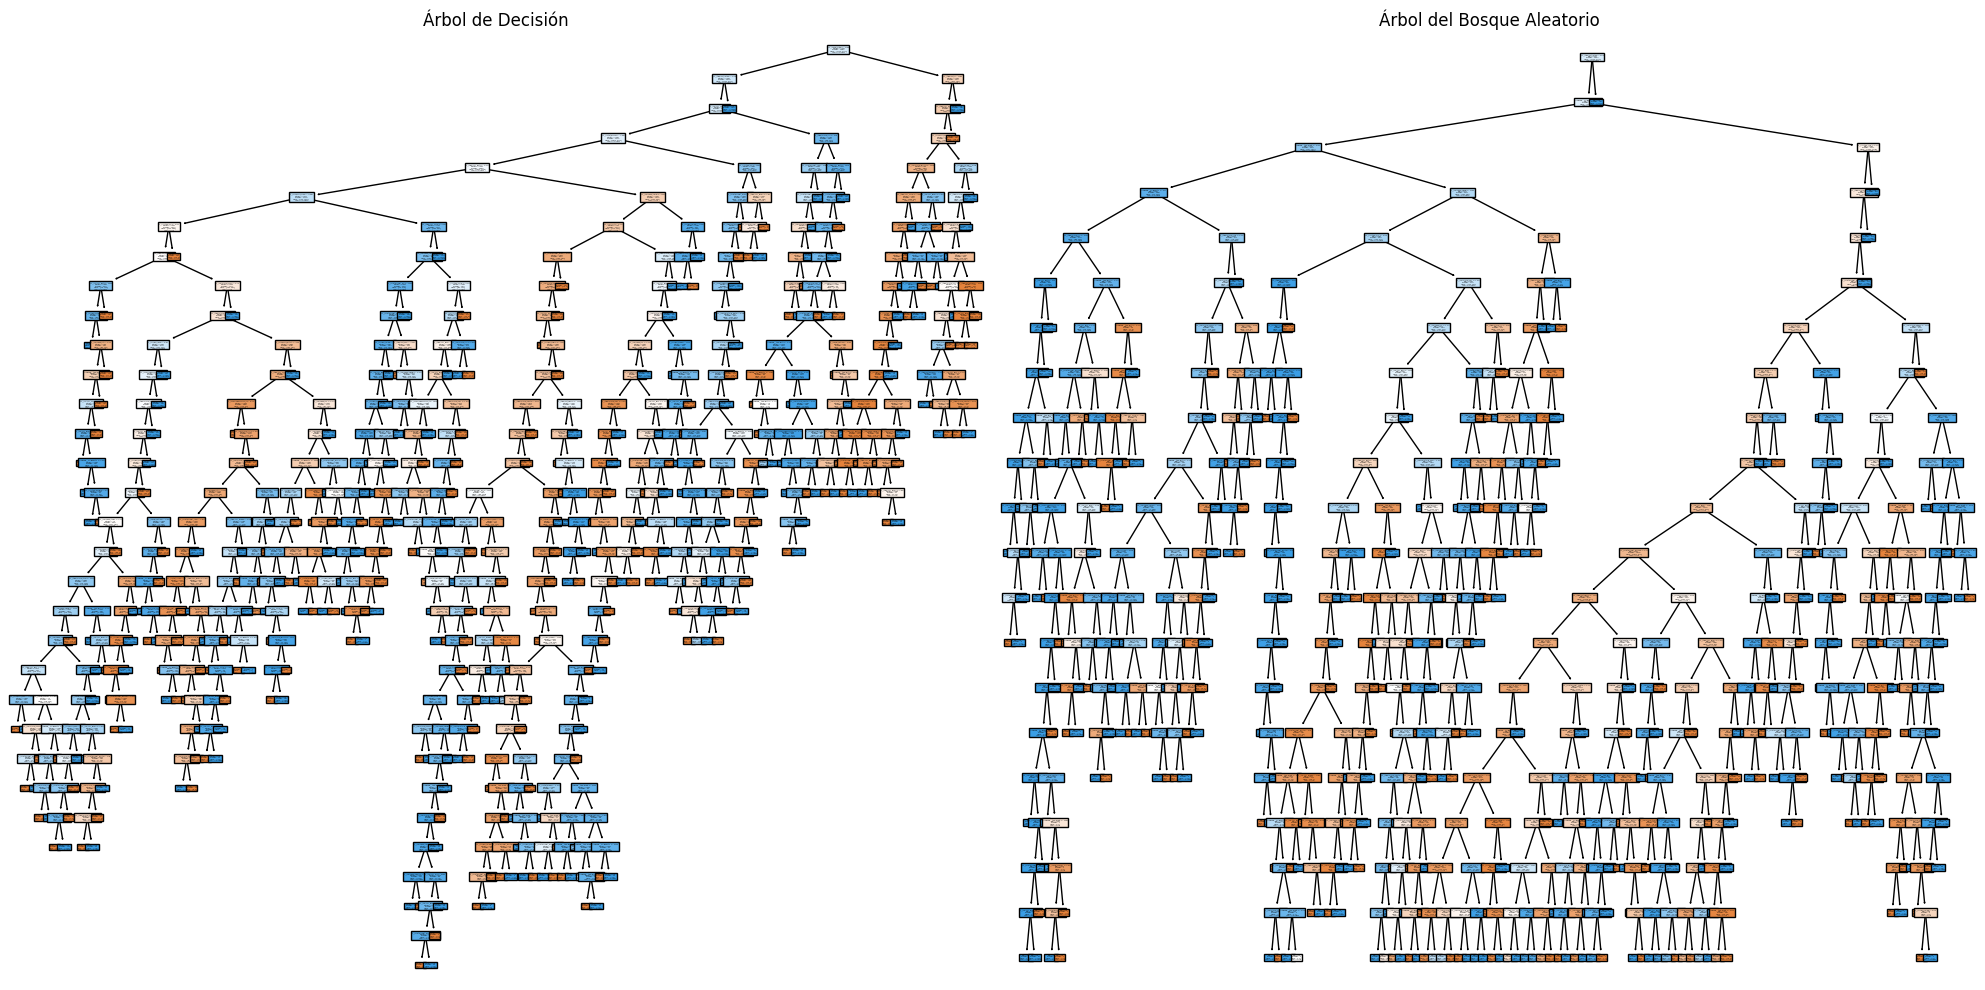

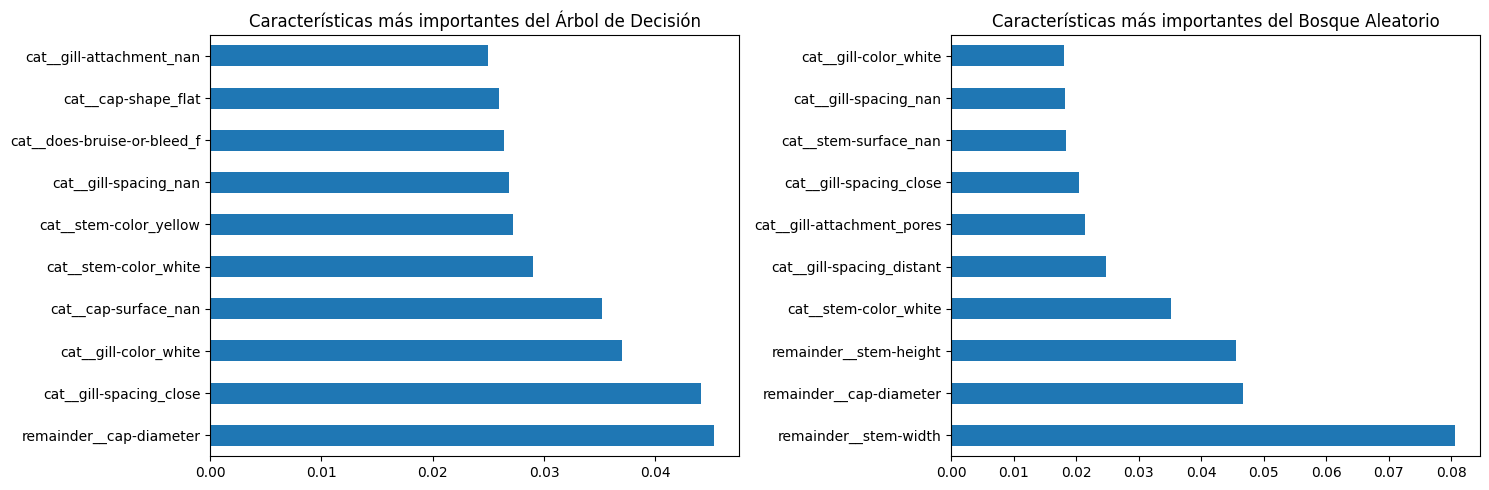

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Entrenar los modelos de árboles de decisión con los datos de entrenamiento
decision_tree = estimators['Decision Tree'].fit(X_train, y_train)
random_forest = estimators['Random Forest'].fit(X_train, y_train)

# Crear una figura para los árboles de decisión
fig, axes = plt.subplots(1, 2, figsize=(20, 10))  # 1 fila, 2 columnas

# Visualizar el árbol de decisión
plot_tree(decision_tree, feature_names=X.columns, class_names=encoder.classes_, filled=True, ax=axes[0])
axes[0].set_title("Árbol de Decisión")

# Visualizar uno de los árboles del bosque aleatorio
plot_tree(random_forest.estimators_[0], feature_names=X.columns, class_names=encoder.classes_, filled=True, ax=axes[1])
axes[1].set_title("Árbol del Bosque Aleatorio")

plt.tight_layout()
plt.show()

# Graficar las características más importantes
fig, axes = plt.subplots(1, 2, figsize=(15, 5))  # 1 fila, 2 columnas

# Características más importantes del árbol de decisión
decision_tree_importances = pd.Series(decision_tree.feature_importances_, index=X.columns)
decision_tree_importances.nlargest(10).plot(kind='barh', ax=axes[0])
axes[0].set_title("Características más importantes del Árbol de Decisión")

# Características más importantes del bosque aleatorio
random_forest_importances = pd.Series(random_forest.feature_importances_, index=X.columns)
random_forest_importances.nlargest(10).plot(kind='barh', ax=axes[1])
axes[1].set_title("Características más importantes del Bosque Aleatorio")

plt.tight_layout()
plt.show()

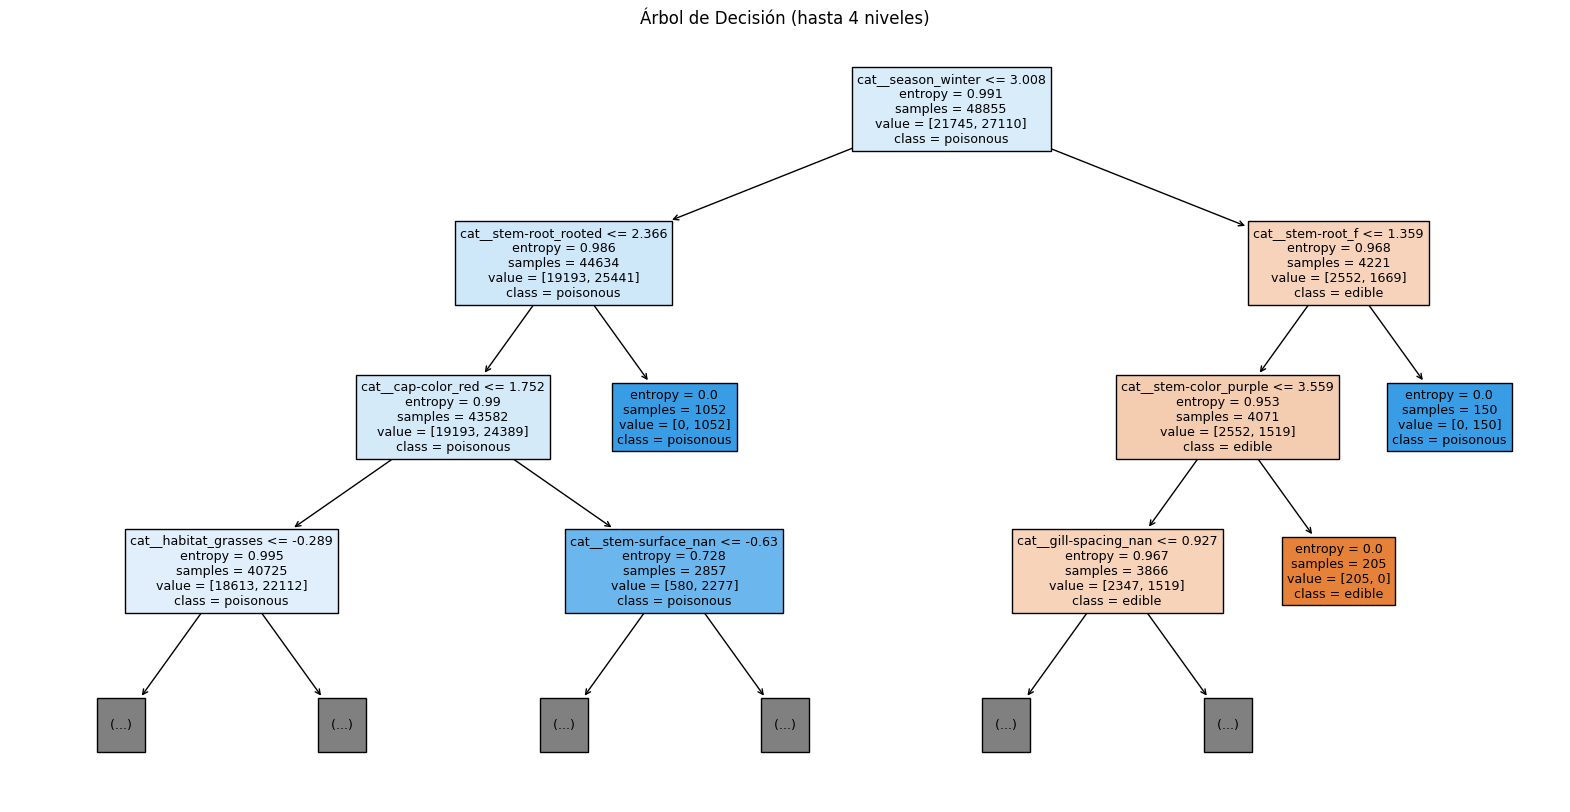

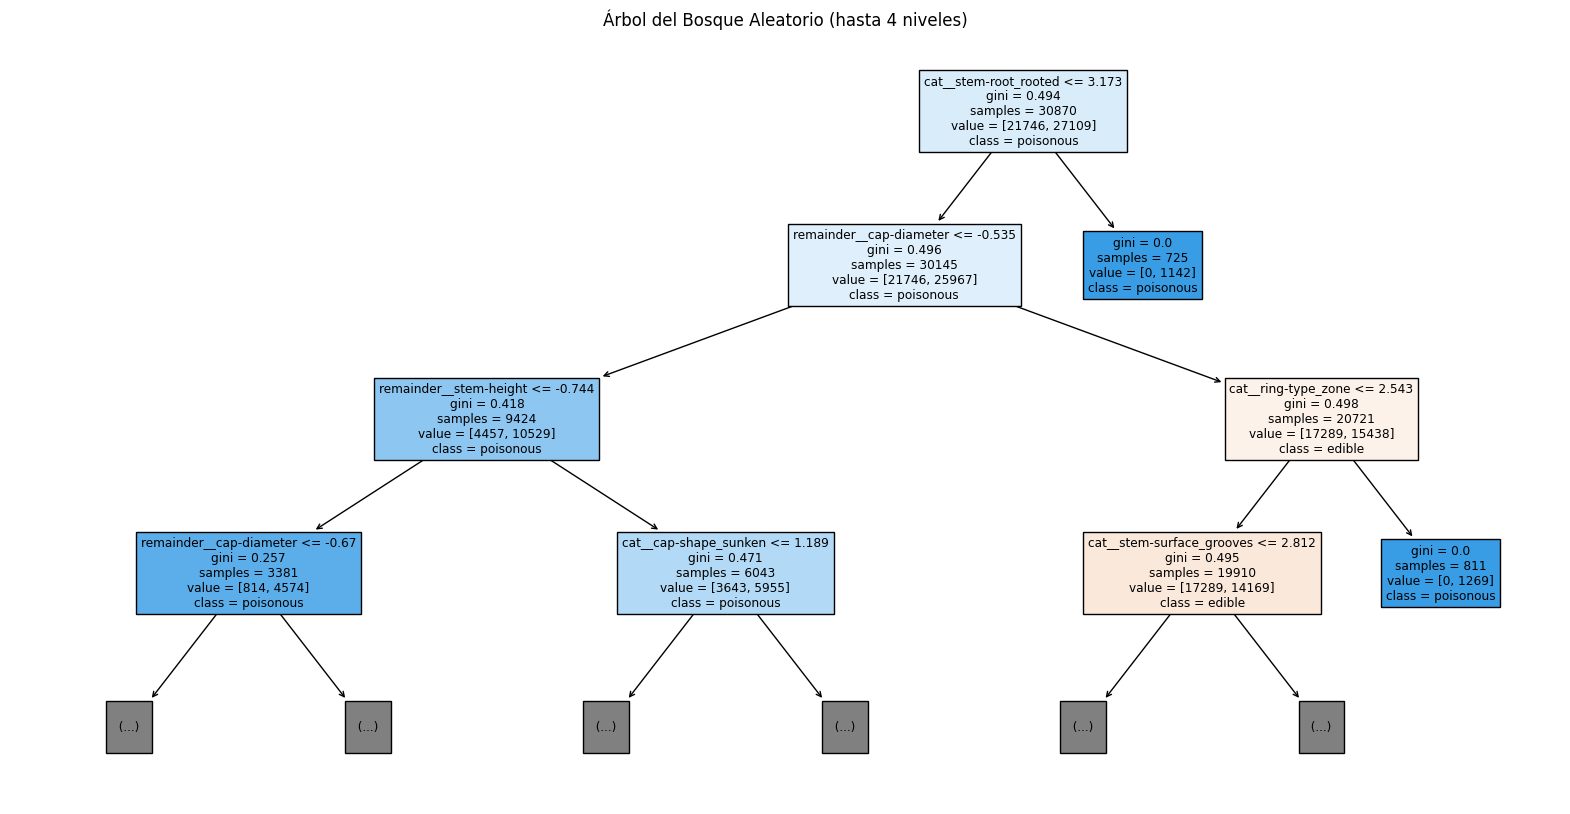

In [ ]:
# Visualizar el árbol de decisión truncado a 3 niveles
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(decision_tree, feature_names=X.columns, class_names=encoder.classes_, filled=True, max_depth=3, ax=ax)
ax.set_title("Árbol de Decisión (hasta 3 niveles)")
plt.show()

# Visualizar uno de los árboles del bosque aleatorio truncado a 3 niveles
fig, ax = plt.subplots(figsize=(20, 10))
plot_tree(random_forest.estimators_[0], feature_names=X.columns, class_names=encoder.classes_, filled=True, max_depth=3, ax=ax)
ax.set_title("Árbol del Bosque Aleatorio (hasta 3 niveles)")
plt.show()

### 6.4.1 Observaciones Generales:

1. **Características Compartidas**:
   - Ambas técnicas consideran algunas características similares como importantes, aunque con diferentes grados de importancia. Por ejemplo, la característica `remainder__cap-diameter` aparece en ambos modelos, lo que indica que el diámetro del capuchón es un atributo relevante para la clasificación de las muestras.

2. **Variabilidad en la Importancia**:
   - A pesar de algunas características compartidas, cada modelo también tiene atributos únicos que considera importantes. Esto refleja la naturaleza de cada algoritmo y cómo construyen sus decisiones.
   - El Árbol de Decisión destaca más atributos categóricos como `cat__gill-attachment_nan` y `cat__cap-shape_flat`, mientras que el Bosque Aleatorio considera tanto atributos categóricos como numéricos (`remainder__stem-width`, `remainder__stem-height`) de forma más uniforme.

### Conclusiones:

- **Importancia de Atributos Numéricos**:
  - En general, los atributos numéricos (`cap-diameter`, `stem-width`, `stem-height`) son consistentemente importantes en el Bosque Aleatorio, lo que sugiere que la variabilidad en las mediciones cuantitativas es crucial para la clasificación precisa en este contexto.

- **Relevancia de Categorías Específicas**:
  - El Árbol de Decisión tiende a enfatizar más en características específicas como `gill-attachment_nan` y `cap-shape_flat`, que pueden tener valores missing o específicos críticos para algunas clases del objetivo.

- **Robustez del Bosque Aleatorio**:
  - La mayor dispersión de características importantes en el Bosque Aleatorio indica que este modelo puede manejar mejor la heterogeneidad en los datos, aprovechando un conjunto diverso de atributos para tomar decisiones.

- **Adaptabilidad del Árbol de Decisión**:
  - El Árbol de Decisión muestra adaptabilidad a características específicas que podrían ser cruciales en ciertos contextos o clases, proporcionando una interpretación más directa y sencilla de la importancia de cada atributo.

## 6.5 Una visión mas detallada entre Random Forest y SVM

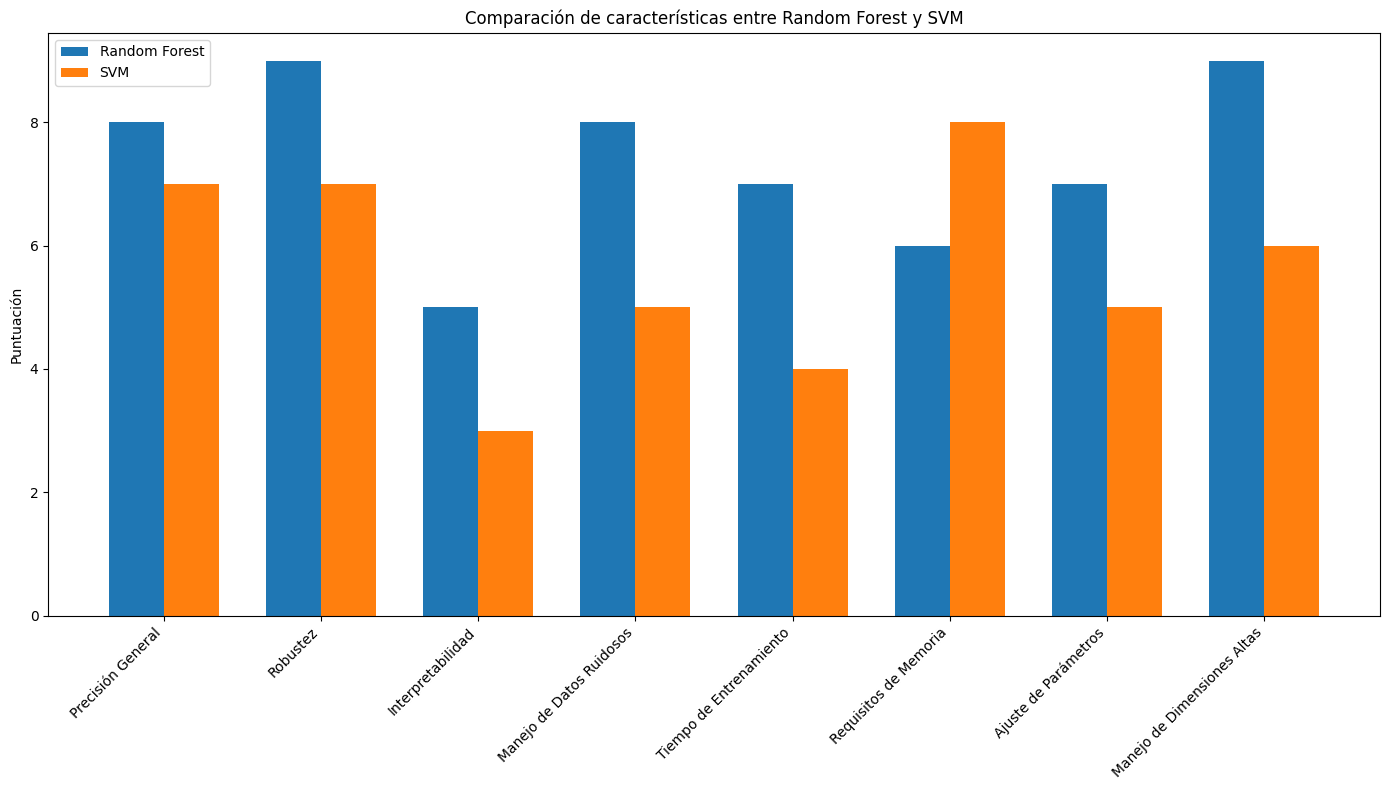

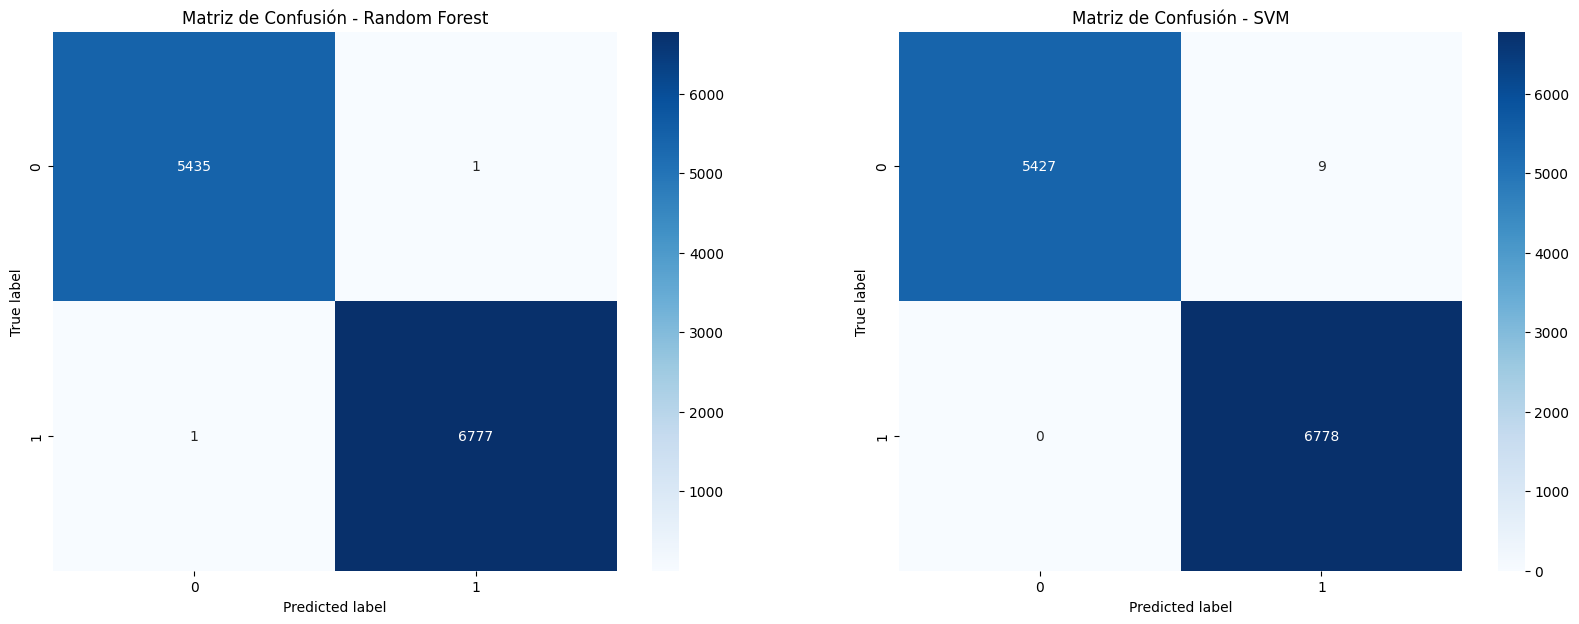

In [ ]:

# Comparación de características y matrices de confusión entre Random Forest y SVM

# Tabla comparativa de características
caracteristicas = ['Precisión General', 'Robustez', 'Interpretabilidad', 'Manejo de Datos Ruidosos', 'Tiempo de Entrenamiento', 'Requisitos de Memoria', 'Ajuste de Parámetros', 'Manejo de Dimensiones Altas']
random_forest = [8, 9, 5, 8, 7, 6, 7, 9]
svm = [7, 7, 3, 5, 4, 8, 5, 6]

x = np.arange(len(caracteristicas))

width = 0.35  # el ancho de las barras

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, random_forest, width, label='Random Forest')
rects2 = ax.bar(x + width/2, svm, width, label='SVM')

# Añadir etiquetas, título y leyenda
ax.set_ylabel('Puntuación')
ax.set_title('Comparación de características entre Random Forest y SVM')
ax.set_xticks(x)
ax.set_xticklabels(caracteristicas, rotation=45, ha='right')
ax.legend()

# Mostrar las barras
fig.tight_layout()
plt.show()

# Comparación de las matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# Random Forest
sns.heatmap(results['Random Forest']['Matriz de Confusión'], annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Matriz de Confusión - Random Forest')
axes[0].set_ylabel('True label')
axes[0].set_xlabel('Predicted label')

# SVM
sns.heatmap(results['SVM']['Matriz de Confusión'], annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Matriz de Confusión - SVM')
axes[1].set_ylabel('True label')
axes[1].set_xlabel('Predicted label')

plt.show()


En definitiva, aunque el modelo Random Forest se destaca como una opción altamente efectiva para la clasificación de productos comestibles y no comestibles debido a su capacidad para minimizar falsos negativos en la detección de productos peligrosos, es el SVM el que se posiciona como el modelo ganador en este caso específico.

Esto se debe a que el SVM no clasifica erróneamente los productos venenosos, lo cual es crucial para garantizar la seguridad alimentaria y la protección del consumidor. La precisión del SVM en la identificación de productos peligrosos es especialmente importante en aplicaciones donde incluso un solo error podría tener consecuencias graves.

No obstante, es importante considerar que la aparente superioridad del SVM en este escenario puede estar influenciada por la naturaleza específica del conjunto de datos utilizado o por la cantidad limitada de datos disponibles, en contextos donde los datos son escasos, los modelos pueden comportarse de manera diferente y algunas de sus fortalezas o debilidades pueden no ser tan evidentes, en este sentido, el rendimiento del SVM podría estar optimizado para este conjunto de datos particular, mientras que en escenarios más amplios o con diferentes características de datos, su rendimiento podría variar.

Por otro lado, el Random Forest, aunque tiene un F1 score inferior en este caso, es conocido por su capacidad para manejar grandes cantidades de datos y por su robustez en una variedad de contextos, su habilidad para minimizar los falsos negativos lo hace particularmente útil cuando la cantidad de datos es grande y diversa, además la naturaleza del Random Forest, que combina múltiples árboles de decisión para mejorar la precisión y reducir el sobreajuste, lo convierte en una herramienta versátil y confiable en muchos escenarios de clasificación.

Por lo tanto, mientras que el SVM demuestra ser invaluable en contextos específicos donde la precisión en la detección de productos venenosos es absolutamente crucial, el Random Forest sigue siendo una opción preferible para asegurar una clasificación robusta y fiable en una gama más amplia de situaciones.

# Bibliografia
- Paper 1: https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=10428619&tag=1
- Notebook 1: https://www.kaggle.com/code/nirajvermafcb/comparing-various-ml-models-roc-curve-comparison
- GridSearchCV para DecisionTreeClassifier: https://www.kaggle.com/code/fermatsavant/decision-tree-high-acc-using-gridsearchcv
- Regresion Logistica: https://medium.com/30-days-of-machine-learning/day-4-logistic-regression-df9a7a2220cd